predicted the stock prices for the different vaccination companies around the world. For this analysis we are considering 5 Biotech- Companies that are listed on the New York Stock Exchange (NYSE). Forecast our prediction using different methods such as Moving Average (MA), Exponential Smoothing, FB Prophet, LSTM. we assumed different weights for each stock and built our portfolio.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In C:\Users\Nitin\Anaconda3\envs\DAB300\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Nitin\Anaconda3\envs\DAB300\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Nitin\Anaconda3\envs\DAB300\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Nitin\Anaconda3\envs\DAB300\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Nitin\Anaconda3\envs\DAB300\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
from pandas_datareader import data as wb
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

# Pfizer Inc - PFE 

### Moving Average

In [3]:
myticker ='PFE'
df_PFE= web.DataReader([myticker], 'yahoo', start='2017-1-1')['Close']
df_PFE.columns = {'Close Price'}
df_PFE.tail(10)

Close Price
Date                   
2021-04-01    36.299999
2021-04-05    36.279999
2021-04-06    36.049999
2021-04-07    35.910000
2021-04-08    35.959999
2021-04-09    36.599998
2021-04-12    36.970001
2021-04-13    37.160000
2021-04-14    37.169998
2021-04-15    37.610001

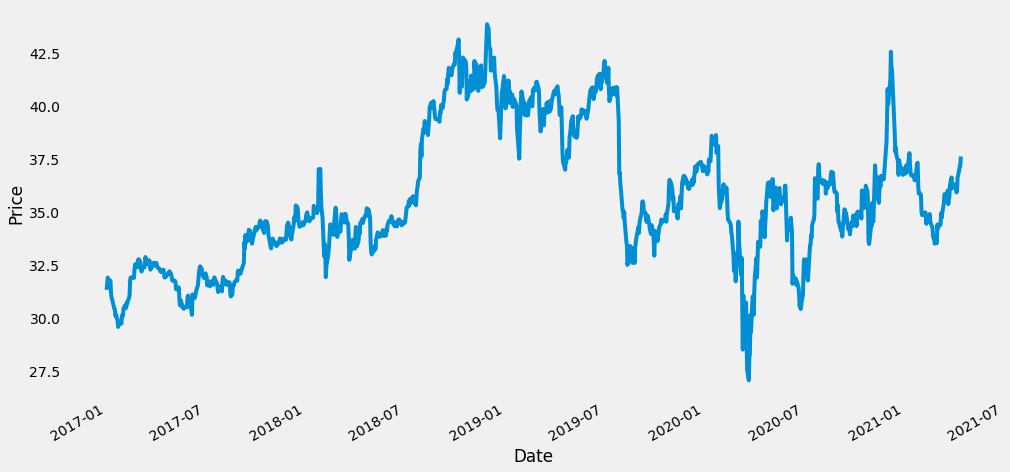

In [4]:
df_PFE['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

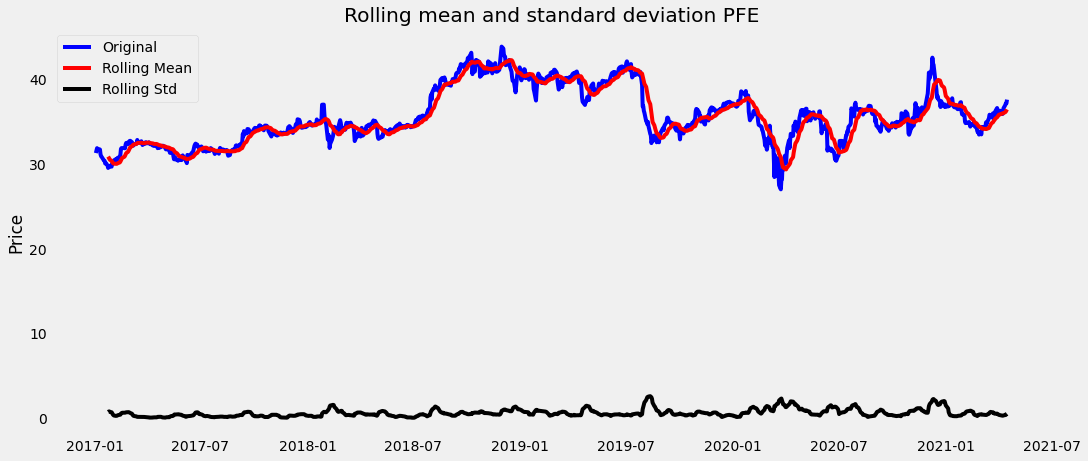

In [5]:
rolling_mean = df_PFE['Close Price'].rolling(15).mean()
rolling_std = df_PFE['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df_PFE['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [6]:
df1_PFE=df_PFE.copy()

In [7]:
# create 20 days simple moving average column
df1_PFE['SMA20'] = df1_PFE['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df1_PFE['SMA50'] = df1_PFE['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df1_PFE.head(10)

Close Price      SMA20      SMA50
Date                                         
2017-01-03    31.309298  31.309298  31.309298
2017-01-04    31.584440  31.446869  31.446869
2017-01-05    31.888046  31.593928  31.593928
2017-01-06    31.764706  31.636622  31.636622
2017-01-09    31.755219  31.660342  31.660342
2017-01-10    31.726755  31.671411  31.671411
2017-01-11    31.148008  31.596639  31.596639
2017-01-12    30.929790  31.513283  31.513283
2017-01-13    30.853889  31.440017  31.440017
2017-01-17    30.417458  31.337761  31.337761

In [8]:
df1_PFE['Signal'] = 0.0
df1_PFE['Signal'] = np.where(df1_PFE['SMA20'] > df1_PFE['SMA50'], 1.0, 0.0)

In [9]:
df1_PFE['Position'] = df1_PFE['Signal'].diff()
# display first few rows
df1_PFE.tail()

Close Price    SMA20    SMA50  Signal  Position
Date                                                       
2021-04-09    36.599998  35.9110  35.1106     1.0       0.0
2021-04-12    36.970001  36.0125  35.1328     1.0       0.0
2021-04-13    37.160000  36.1000  35.1580     1.0       0.0
2021-04-14    37.169998  36.1670  35.1854     1.0       0.0
2021-04-15    37.610001  36.2580  35.2378     1.0       0.0

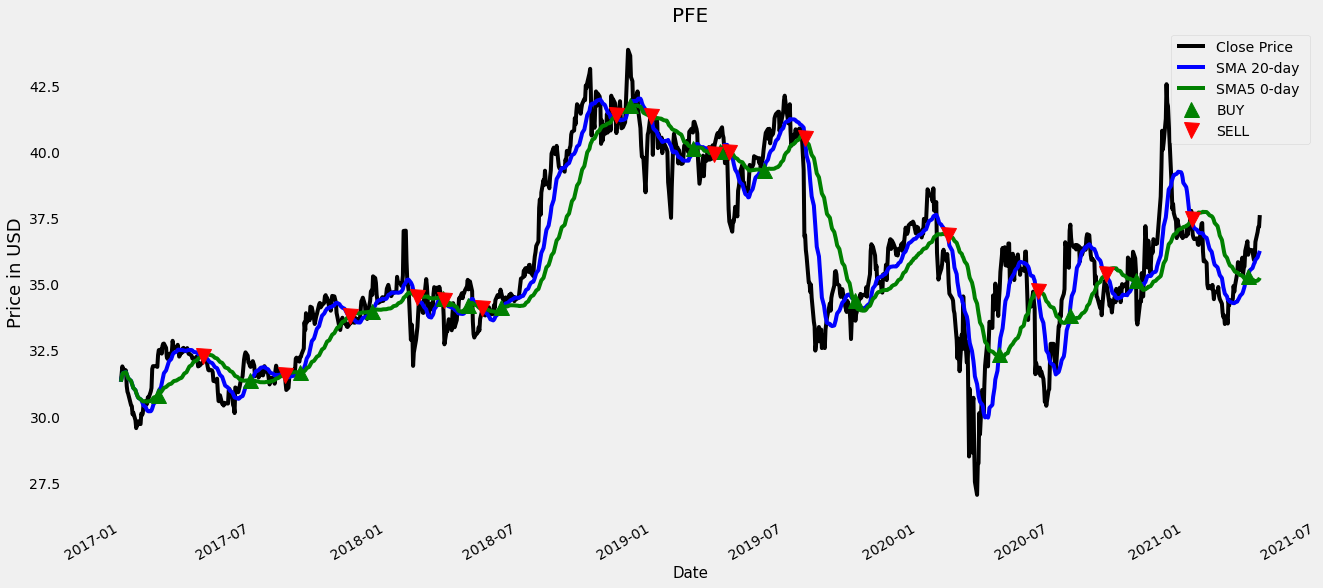

In [10]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df1_PFE['Close Price'].plot(color = 'k', label= 'Close Price') 
df1_PFE['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df1_PFE['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df1_PFE[df1_PFE['Position'] == 1].index, 
         df1_PFE['SMA20'][df1_PFE['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df1_PFE[df1_PFE['Position'] == -1].index, 
         df1_PFE['SMA50'][df1_PFE['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [11]:
df_position_PFE= df1_PFE[(df1_PFE['Position'] == 1) | (df1_PFE['Position'] == -1)]
df_position_PFE['Position'] = df_position_PFE['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position_PFE, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2017-02-23 00:00:00 |       32.315  | 30.825  | 30.8215 |        1 | Buy        |
| 2017-04-25 00:00:00 |       32.0304 | 32.2642 | 32.2829 |        0 | Sell       |
| 2017-06-29 00:00:00 |       31.907  | 31.3714 | 31.352  |        1 | Buy        |
| 2017-08-16 00:00:00 |       31.6509 | 31.5688 | 31.5784 |        0 | Sell       |
| 2017-09-06 00:00:00 |       32.2486 | 31.6722 | 31.6596 |        1 | Buy        |
| 2017-11-14 00:00:00 |       33.5674 | 33.7865 | 33.7894 |        0 | Sell       |
| 2017-12-13 00:00:00 |       34.7628 | 33.9744 | 33.971  |        1 | Buy        |
| 2018-02-13 00:00:00 |       33.1499 | 34.5185 | 34.5247 |        0 | Sell       |
| 2018-03-21 00:00:00 |       34.4118 | 34.4867 | 34.4619 |        1 | Buy  

## Exponential smoothing

In [12]:
df2_PFE=df_PFE.copy()

In [13]:
df2_PFE['EMA20'] = df2_PFE['Close Price'].ewm(span = 20, adjust = False).mean()

In [14]:
df2_PFE['EMA50'] = df2_PFE['Close Price'].ewm(span = 50, adjust = False).mean()

In [15]:
df2_PFE['Signal'] = 0.0  
df2_PFE['Signal'] = np.where(df2_PFE['EMA20'] > df2_PFE['EMA50'], 1.0, 0.0)

In [16]:
df2_PFE['Position'] = df2_PFE['Signal'].diff()

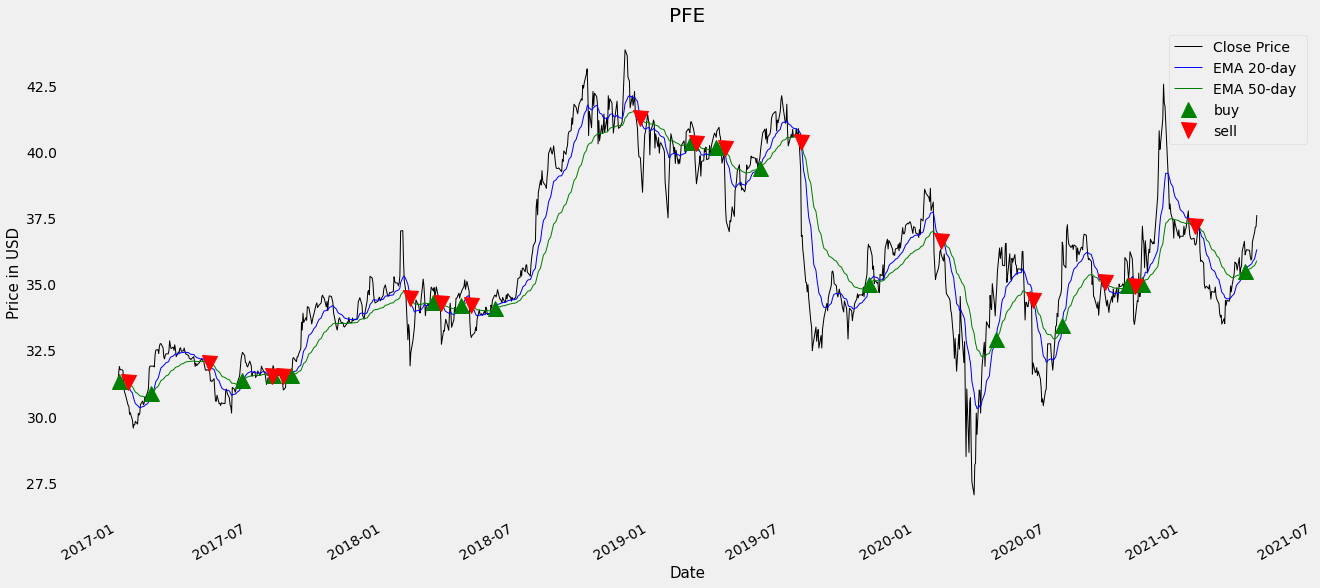

In [17]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df2_PFE['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df2_PFE['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df2_PFE['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df2_PFE[df2_PFE['Position'] == 1].index, 
         df2_PFE['EMA20'][df2_PFE['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df2_PFE[df2_PFE['Position'] == -1].index, 
         df2_PFE['EMA50'][df2_PFE['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## FB prophet

In [18]:
df = wb.DataReader('PFE', data_source='yahoo', start='2017-1-1')

In [19]:
df=df.reset_index()
df

Date       High        Low       Open      Close      Volume  \
0    2017-01-03  31.309298  30.920303  31.024668  31.309298  23391844.0   
1    2017-01-04  31.641365  31.337761  31.432638  31.584440  22753963.0   
2    2017-01-05  31.963947  31.423149  31.660341  31.888046  21083584.0   
3    2017-01-06  31.973434  31.631880  31.935484  31.764706  18418228.0   
4    2017-01-09  31.944971  31.669828  31.717268  31.755219  21559886.0   
...         ...        ...        ...        ...        ...         ...   
1073 2021-04-09  36.810001  35.900002  35.900002  36.599998  31635100.0   
1074 2021-04-12  37.029999  36.330002  36.480000  36.970001  29944900.0   
1075 2021-04-13  37.650002  36.889999  37.410000  37.160000  33967400.0   
1076 2021-04-14  37.380001  36.959999  37.169998  37.169998  23813900.0   
1077 2021-04-15  37.740002  37.270000  37.259998  37.610001  21946800.0   

      Adj Close  
0     26.653324  
1     26.887548  
2     27.146002  
3     27.041008  
4     27.032928  
...         ...  
1073  36.599998  
1074  36.970001  
1075  37.160000  
1076  37.169998  
1077  37.610001  

[1078 rows x 7 columns]

In [20]:
start_date='2021-02-01'
end_date='2021-04-01'

In [21]:
a='2021-02-01'

In [22]:
df_train=df[df['Date'] < a]

In [23]:
df_train.tail()

Date       High        Low       Open      Close      Volume  \
1021 2021-01-25  37.290001  36.320000  36.549999  37.279999  31728500.0   
1022 2021-01-26  37.599998  37.160000  37.270000  37.310001  27718700.0   
1023 2021-01-27  37.040001  36.169998  36.990002  36.240002  50561200.0   
1024 2021-01-28  36.330002  35.840000  35.950001  35.860001  39466700.0   
1025 2021-01-29  36.880001  35.619999  36.880001  35.900002  60026600.0   

      Adj Close  
1021  36.878807  
1022  36.908485  
1023  35.850002  
1024  35.860001  
1025  35.900002

In [24]:
df_test =df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
df_test

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  35.779999  34.270000  35.759998  34.990002  84062400.0   
1028 2021-02-03  35.290001  34.779999  34.990002  34.840000  38524200.0   
1029 2021-02-04  35.080002  34.700001  34.810001  34.889999  34284900.0   
1030 2021-02-05  35.080002  34.779999  34.919998  34.919998  31645100.0   
1031 2021-02-08  35.009998  34.740002  34.959999  34.820000  31633900.0   
1032 2021-02-09  35.060001  34.759998  34.799999  34.970001  30170200.0   
1033 2021-02-10  35.080002  34.700001  35.000000  34.740002  29039900.0   
1034 2021-02-11  34.810001  34.279999  34.799999  34.430000  30845500.0   
1035 2021-02-12  34.950001  34.360001  34.439999  34.720001  25513100.0   
1036 2021-02-16  34.860001  34.560001  34.849998  34.689999  28730300.0   
1037 2021-02-17  35.000000  34.459999  34.570000  34.889999  26389400.0   
1038 2021-02-18  34.880001  34.520000  34.779999  34.560001  24052500.0   
1039 2021-02-19  34.680000  34.400002  34.660000  34.439999  28145300.0   
1040 2021-02-22  34.369999  34.040001  34.330002  34.259998  34322500.0   
1041 2021-02-23  34.189999  33.680000  34.000000  33.910000  37624200.0   
1042 2021-02-24  34.049999  33.669998  33.869999  33.750000  30686100.0   
1043 2021-02-25  34.110001  33.540001  33.820000  33.820000  37506100.0   
1044 2021-02-26  33.900002  33.360001  33.840000  33.490002  41418100.0   
1045 2021-03-01  33.930000  33.509998  33.590000  33.689999  30176500.0   
1046 2021-03-02  33.889999  33.500000  33.680000  33.509998  27621600.0   
1047 2021-03-03  34.450001  33.439999  33.509998  34.389999  45946300.0   
1048 2021-03-04  35.090000  33.840000  34.259998  34.200001  45402600.0   
1049 2021-03-05  34.549999  33.959999  34.290001  34.389999  30568500.0   
1050 2021-03-08  34.869999  34.330002  34.480000  34.349998  24330500.0   
1051 2021-03-09  34.849998  34.439999  34.540001  34.450001  25145400.0   
1052 2021-03-10  35.139999  34.520000  34.639999  34.930000  33492300.0   
1053 2021-03-11  35.119999  34.660000  35.070000  34.709999  24511100.0   
1054 2021-03-12  34.980000  34.509998  34.560001  34.939999  16328500.0   
1055 2021-03-15  35.430000  34.959999  35.009998  35.410000  21896100.0   
1056 2021-03-16  35.860001  35.310001  35.470001  35.830002  24862300.0   
1057 2021-03-17  35.959999  35.119999  35.830002  35.790001  42299500.0   
1058 2021-03-18  35.970001  35.520000  35.529999  35.770000  24716200.0   
1059 2021-03-19  35.820000  35.470001  35.750000  35.529999  48256600.0   
1060 2021-03-22  36.009998  35.360001  35.480000  36.000000  25427500.0   
1061 2021-03-23  35.930000  35.320000  35.820000  35.360001  27970500.0   
1062 2021-03-24  35.930000  35.369999  35.480000  35.610001  22883400.0   
1063 2021-03-25  35.790001  35.250000  35.650002  35.669998  24875300.0   
1064 2021-03-26  36.290001  35.639999  35.680000  36.250000  27897100.0   
1065 2021-03-29  36.740002  35.900002  36.029999  36.619999  27004800.0   
1066 2021-03-30  36.630001  36.020000  36.590000  36.110001  26303300.0   
1067 2021-03-31  36.430000  36.040001  36.150002  36.230000  26582700.0   
1068 2021-04-01  36.450001  36.020000  36.299999  36.299999  21299700.0   

      Adj Close  
1027  34.990002  
1028  34.840000  
1029  34.889999  
1030  34.919998  
1031  34.820000  
1032  34.970001  
1033  34.740002  
1034  34.430000  
1035  34.720001  
1036  34.689999  
1037  34.889999  
1038  34.560001  
1039  34.439999  
1040  34.259998  
1041  33.910000  
1042  33.750000  
1043  33.820000  
1044  33.490002  
1045  33.689999  
1046  33.509998  
1047  34.389999  
1048  34.200001  
1049  34.389999  
1050  34.349998  
1051  34.450001  
1052  34.930000  
1053  34.709999  
1054  34.939999  
1055  35.410000  
1056  35.830002  
1057  35.790001  
1058  35.770000  
1059  35.529999  
1060  36.000000  
1061  35.360001  
1062  35.610001  
1063  35.669998  
1064  36.250000  
1065  36.619999  
1066  36.110001  
1067  36.230000  
1068  36.299999

In [25]:
df.describe()

High          Low         Open        Close        Volume  \
count  1078.000000  1078.000000  1078.000000  1078.000000  1.078000e+03   
mean     35.897883    35.282737    35.600353    35.590809  2.605391e+07   
std       3.301251     3.233127     3.275701     3.268629  1.361127e+07   
min      28.064516    26.451612    27.286528    27.030361  5.187683e+06   
25%      33.738140    33.104838    33.453510    33.490367  1.819915e+07   
50%      35.142315    34.601517    34.909868    34.889999  2.285842e+07   
75%      38.012334    37.229602    37.590134    37.575902  2.952923e+07   
max      44.089184    43.415562    43.994308    43.861481  2.301539e+08   

         Adj Close  
count  1078.000000  
mean     32.940480  
std       3.677610  
min      25.159119  
25%      30.098958  
50%      33.297476  
75%      36.119614  
max      42.101986

In [26]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
#df_train=df_train.reset_index()
df_train[['ds','y']]= df_train[['Date','Close']]

In [27]:
df_train

Date       High        Low       Open      Close      Volume  \
0    2017-01-03  31.309298  30.920303  31.024668  31.309298  23391844.0   
1    2017-01-04  31.641365  31.337761  31.432638  31.584440  22753963.0   
2    2017-01-05  31.963947  31.423149  31.660341  31.888046  21083584.0   
3    2017-01-06  31.973434  31.631880  31.935484  31.764706  18418228.0   
4    2017-01-09  31.944971  31.669828  31.717268  31.755219  21559886.0   
...         ...        ...        ...        ...        ...         ...   
1021 2021-01-25  37.290001  36.320000  36.549999  37.279999  31728500.0   
1022 2021-01-26  37.599998  37.160000  37.270000  37.310001  27718700.0   
1023 2021-01-27  37.040001  36.169998  36.990002  36.240002  50561200.0   
1024 2021-01-28  36.330002  35.840000  35.950001  35.860001  39466700.0   
1025 2021-01-29  36.880001  35.619999  36.880001  35.900002  60026600.0   

      Adj Close         ds          y  
0     26.653324 2017-01-03  31.309298  
1     26.887548 2017-01-04  31.584440  
2     27.146002 2017-01-05  31.888046  
3     27.041008 2017-01-06  31.764706  
4     27.032928 2017-01-09  31.755219  
...         ...        ...        ...  
1021  36.878807 2021-01-25  37.279999  
1022  36.908485 2021-01-26  37.310001  
1023  35.850002 2021-01-27  36.240002  
1024  35.860001 2021-01-28  35.860001  
1025  35.900002 2021-01-29  35.900002  

[1026 rows x 9 columns]

In [28]:
model=Prophet()

In [29]:
# drop the columans
prophet_df=df_train.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [30]:
prophet_df.reset_index(drop=True,inplace=True)

In [31]:
prophet_df

ds          y
0    2017-01-03  31.309298
1    2017-01-04  31.584440
2    2017-01-05  31.888046
3    2017-01-06  31.764706
4    2017-01-09  31.755219
...         ...        ...
1021 2021-01-25  37.279999
1022 2021-01-26  37.310001
1023 2021-01-27  36.240002
1024 2021-01-28  35.860001
1025 2021-01-29  35.900002

[1026 rows x 2 columns]

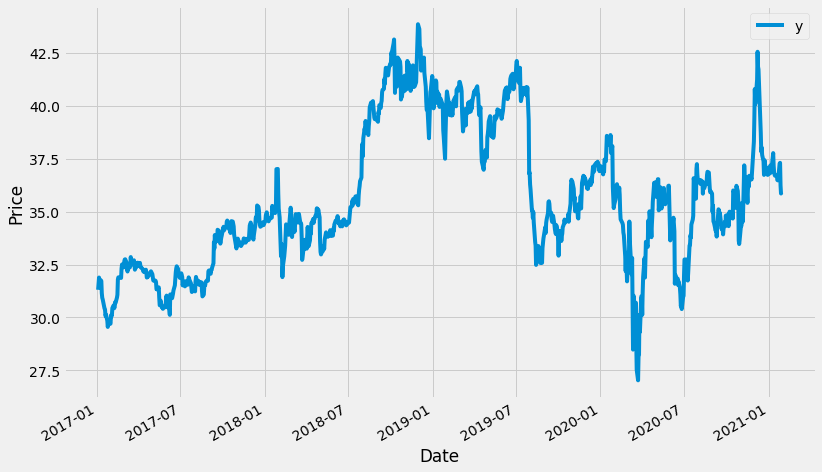

In [32]:
ax = prophet_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')


plt.show()

In [33]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future=model.make_future_dataframe(periods=62)

In [35]:
future.tail(5)

ds
1083 2021-03-28
1084 2021-03-29
1085 2021-03-30
1086 2021-03-31
1087 2021-04-01

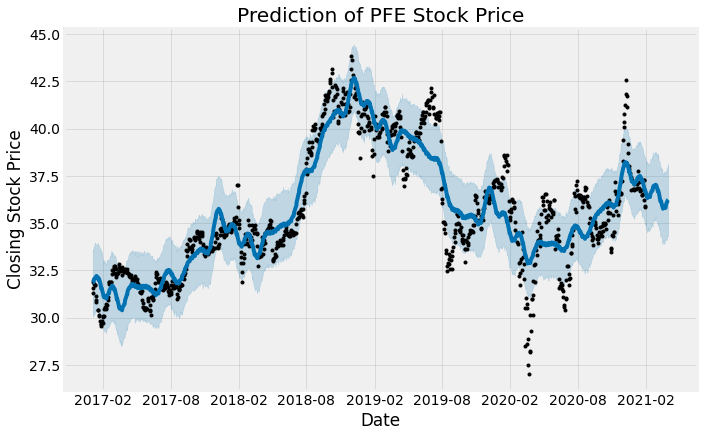

ds       yhat  yhat_lower  yhat_upper
1083 2021-03-28  36.087672   34.092283   37.801113
1084 2021-03-29  36.119312   34.371195   37.933114
1085 2021-03-30  36.166395   34.258308   37.971688
1086 2021-03-31  36.222891   34.374353   38.132265
1087 2021-04-01  36.242481   34.485190   37.950927

In [36]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of PFE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

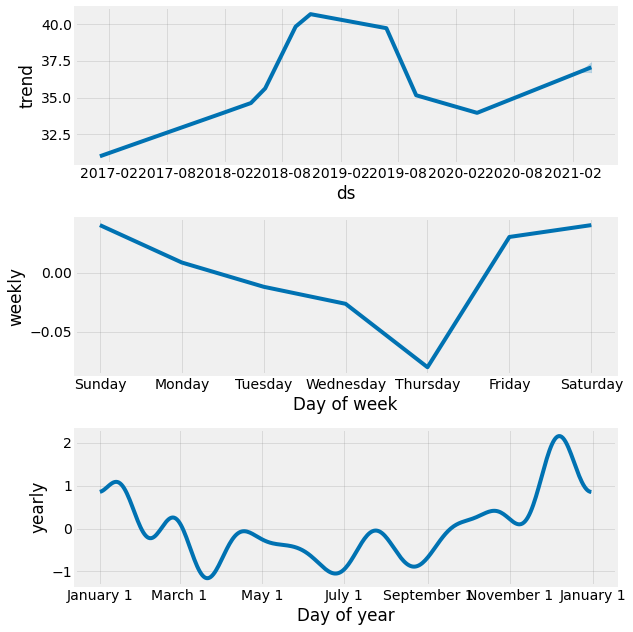

In [37]:
model.plot_components(predictions)
plt.show()

In [38]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2017-01-03  31.882773   30.095510   33.764355
1 2017-01-04  31.897411   30.132811   33.722627
2 2017-01-05  31.876494   30.163436   33.681157
3 2017-01-06  32.021041   30.258311   33.787981
4 2017-01-09  32.102466   30.288077   34.062442

In [39]:
df_test.head()

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  35.779999  34.270000  35.759998  34.990002  84062400.0   
1028 2021-02-03  35.290001  34.779999  34.990002  34.840000  38524200.0   
1029 2021-02-04  35.080002  34.700001  34.810001  34.889999  34284900.0   
1030 2021-02-05  35.080002  34.779999  34.919998  34.919998  31645100.0   
1031 2021-02-08  35.009998  34.740002  34.959999  34.820000  31633900.0   

      Adj Close  
1027  34.990002  
1028  34.840000  
1029  34.889999  
1030  34.919998  
1031  34.820000

In [40]:
df_test['predictions']=predictions['yhat']

In [41]:
df_test.head()

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  35.779999  34.270000  35.759998  34.990002  84062400.0   
1028 2021-02-03  35.290001  34.779999  34.990002  34.840000  38524200.0   
1029 2021-02-04  35.080002  34.700001  34.810001  34.889999  34284900.0   
1030 2021-02-05  35.080002  34.779999  34.919998  34.919998  31645100.0   
1031 2021-02-08  35.009998  34.740002  34.959999  34.820000  31633900.0   

      Adj Close  predictions  
1027  34.990002    36.617998  
1028  34.840000    36.531584  
1029  34.889999    36.463870  
1030  34.919998    36.410756  
1031  34.820000    36.327664

(34.0, 37.0)

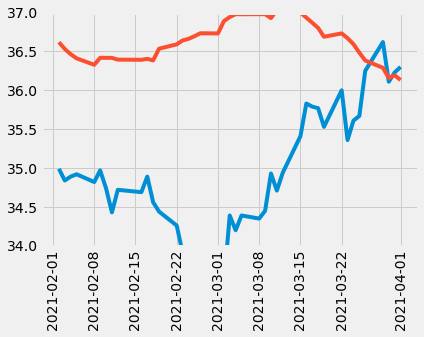

In [42]:
plt.plot(df_test['Date'],df_test['Close'])
plt.plot(df_test['Date'],df_test['predictions'])
plt.xticks(rotation=90)
plt.ylim(34,37)

## LSTM

In [43]:
from sklearn.preprocessing import MinMaxScaler


In [44]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("PFE", start="2017-01-01")

In [45]:
df.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-01-03  31.309298  30.920303  31.024668  31.309298  23391844.0  26.653324
2017-01-04  31.641365  31.337761  31.432638  31.584440  22753963.0  26.887548
2017-01-05  31.963947  31.423149  31.660341  31.888046  21083584.0  27.146002
2017-01-06  31.973434  31.631880  31.935484  31.764706  18418228.0  27.041008
2017-01-09  31.944971  31.669828  31.717268  31.755219  21559886.0  27.032928

In [46]:
df.tail()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-04-09  36.810001  35.900002  35.900002  36.599998  31635100.0  36.599998
2021-04-12  37.029999  36.330002  36.480000  36.970001  29944900.0  36.970001
2021-04-13  37.650002  36.889999  37.410000  37.160000  33967400.0  37.160000
2021-04-14  37.380001  36.959999  37.169998  37.169998  23813900.0  37.169998
2021-04-15  37.740002  37.270000  37.259998  37.610001  21946800.0  37.610001

In [47]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1078, 1)


array([[31.02466774],
       [31.43263817],
       [31.66034126],
       [31.93548393],
       [31.71726799]])

In [48]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [49]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.22373648],
       [0.24815447],
       [0.26178304],
       [0.27825097],
       [0.26519024]])

In [50]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.06416815],
       [0.11584327],
       [0.13003978],
       [0.20670072],
       [0.17944347]])

In [51]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [52]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.22373648, 0.24815447, 0.26178304, 0.27825097, 0.26519024,
        0.27427595, 0.26178304, 0.21408294, 0.22203288, 0.20386146,
        0.18909712, 0.18739353, 0.16808633, 0.16581491, 0.1499148 ,
        0.14764337, 0.1499148 , 0.15388982, 0.15388982, 0.12776823,
        0.15616125, 0.15388982, 0.1868257 , 0.18398633, 0.20215786,
        0.17944347, 0.19193638, 0.20726855, 0.20897215, 0.21408294,
        0.22827934, 0.26632589, 0.27427595, 0.27314029, 0.27314029,
        0.2805224 , 0.30721171, 0.3106189 , 0.30323668, 0.31289045,
        0.32367964, 0.32651901, 0.31629742, 0.29017594, 0.29244748,
        0.290744  , 0.30550822, 0.30550822, 0.29869382, 0.31005108]])

In [53]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.06416815, 0.11584327, 0.13003978, 0.20670072, 0.17944347,
        0.17830781, 0.21976146, 0.29301531, 0.3543442 , 0.29699034,
        0.35604769, 0.40885847, 0.40715498, 0.41453721, 0.4179444 ,
        0.43952302, 0.43270863, 0.3986371 , 0.4656445 , 0.42703011,
        0.4588301 , 0.50141974, 0.58432702, 0.55082332, 0.52470185,
        0.51618396, 0.50198734, 0.57069846, 0.57978417, 0.54798395,
        0.48211244, 0.48211244, 0.53151624, 0.48551963, 0.45655879,
        0.52243031, 0.54400915, 0.51618396, 0.52186248, 0.50028386,
        0.47416238, 0.50482671, 0.49119815, 0.51561614, 0.54003413,
        0.38273699, 0.3844407 , 0.42759794, 0.39466207, 0.42475857]])

In [54]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
#Import all deep learing learning library to create LSTM model
#import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [56]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [57]:
model.add(Dense(units=1))

In [58]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
#Fit the model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 812 samples
Epoch 1/5
812/812 [==============================] - 27s 34ms/sample - loss: 0.0574
Epoch 2/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0121
Epoch 3/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0083
Epoch 4/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0088
Epoch 5/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0083


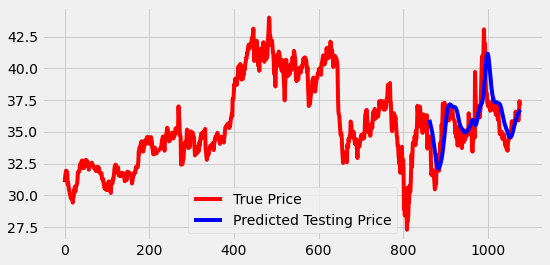

In [60]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

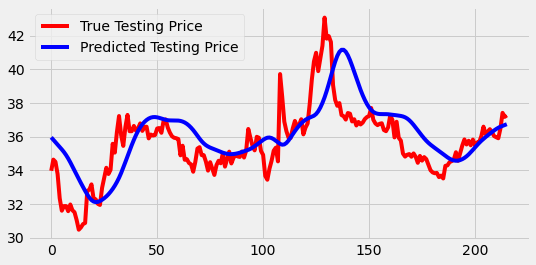

In [61]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [62]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[36.734863, 37.9458, 40.84212, 45.145916, 50.13582]


# Johnson & Johnson - JNJ

In [63]:
myticker ='JNJ'
df_JNJ= web.DataReader([myticker], 'yahoo', start='2017-1-1')['Close']
df_JNJ.columns = {'Close Price'}
df_JNJ.tail(10)

Close Price
Date                   
2021-04-01   162.830002
2021-04-05   163.429993
2021-04-06   163.389999
2021-04-07   163.610001
2021-04-08   162.970001
2021-04-09   161.250000
2021-04-12   161.639999
2021-04-13   159.479996
2021-04-14   159.919998
2021-04-15   160.690002

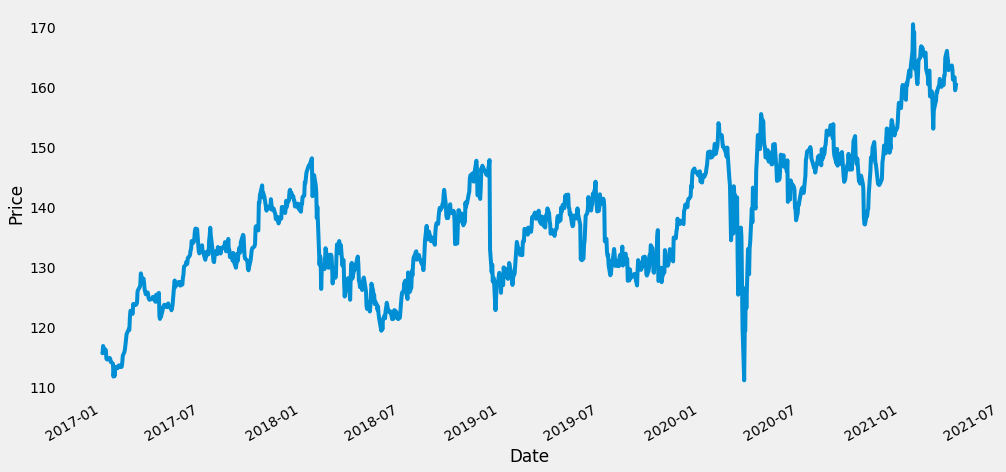

In [64]:
df_JNJ['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

### Moving Average

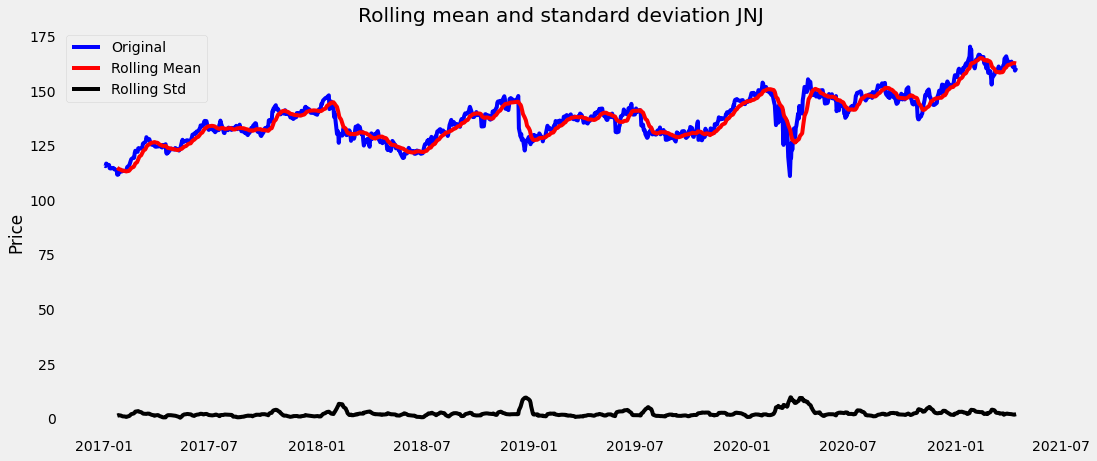

In [65]:
rolling_mean = df_JNJ['Close Price'].rolling(15).mean()
rolling_std = df_JNJ['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df_JNJ['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [66]:
dfJNJ_1=df_JNJ.copy()

In [67]:
# create 20 days simple moving average column
dfJNJ_1['SMA20'] = dfJNJ_1['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
dfJNJ_1['SMA50'] = dfJNJ_1['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
dfJNJ_1.tail()

Close Price       SMA20       SMA50
Date                                           
2021-04-09   161.250000  162.260500  162.034601
2021-04-12   161.639999  162.362499  161.884200
2021-04-13   159.479996  162.315499  161.811200
2021-04-14   159.919998  162.242999  161.755400
2021-04-15   160.690002  162.238999  161.744200

In [68]:
dfJNJ_1['Signal'] = 0.0
dfJNJ_1['Signal'] = np.where(dfJNJ_1['SMA20'] > dfJNJ_1['SMA50'], 1.0, 0.0)

In [69]:
dfJNJ_1['Position'] = dfJNJ_1['Signal'].diff()
# display first few rows
dfJNJ_1.tail()

Close Price       SMA20       SMA50  Signal  Position
Date                                                             
2021-04-09   161.250000  162.260500  162.034601     1.0       1.0
2021-04-12   161.639999  162.362499  161.884200     1.0       0.0
2021-04-13   159.479996  162.315499  161.811200     1.0       0.0
2021-04-14   159.919998  162.242999  161.755400     1.0       0.0
2021-04-15   160.690002  162.238999  161.744200     1.0       0.0

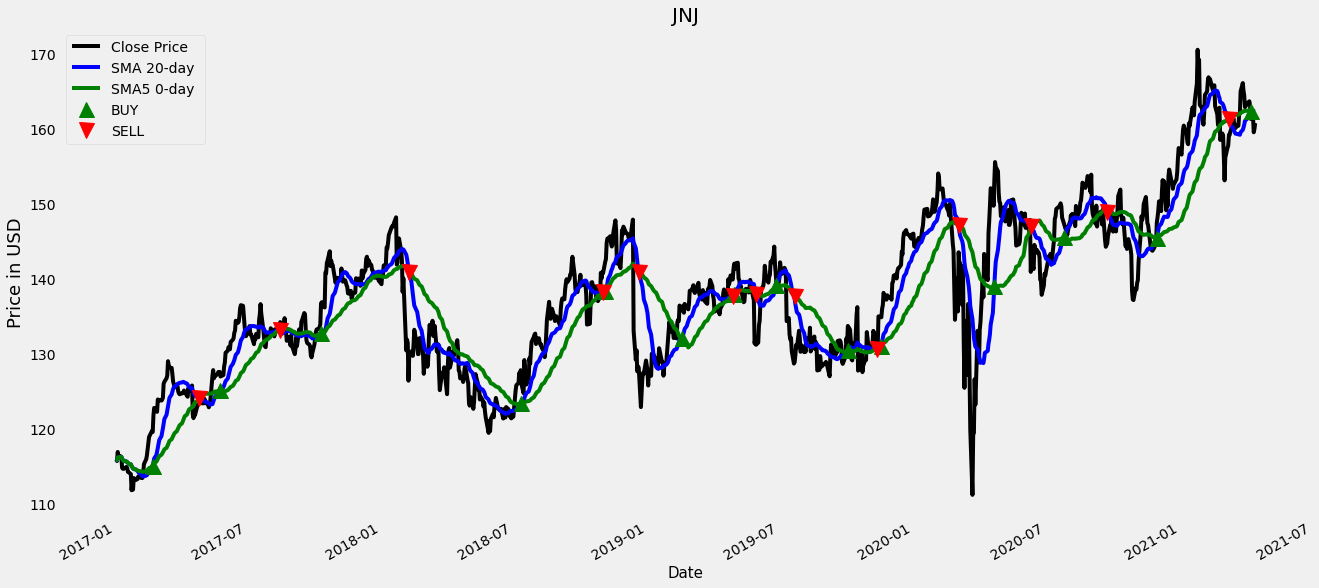

In [70]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
dfJNJ_1['Close Price'].plot(color = 'k', label= 'Close Price') 
dfJNJ_1['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
dfJNJ_1['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(dfJNJ_1[dfJNJ_1['Position'] == 1].index, 
         dfJNJ_1['SMA20'][dfJNJ_1['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(dfJNJ_1[dfJNJ_1['Position'] == -1].index, 
         dfJNJ_1['SMA50'][dfJNJ_1['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [71]:
df_position_jnj= dfJNJ_1[(dfJNJ_1['Position'] == 1) | (dfJNJ_1['Position'] == -1)]
df_position_jnj['Position'] = df_position_jnj['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position_jnj, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2017-02-22 00:00:00 |        119.52 | 115     | 114.989 |        1 | Buy        |
| 2017-04-27 00:00:00 |        123.74 | 123.921 | 124.088 |        0 | Sell       |
| 2017-05-25 00:00:00 |        127.53 | 125.131 | 124.938 |        1 | Buy        |
| 2017-08-16 00:00:00 |        134.17 | 132.995 | 133.108 |        0 | Sell       |
| 2017-10-11 00:00:00 |        136.65 | 132.677 | 132.589 |        1 | Buy        |
| 2018-02-09 00:00:00 |        129.53 | 140.359 | 140.822 |        0 | Sell       |
| 2018-07-12 00:00:00 |        127.76 | 123.38  | 123.235 |        1 | Buy        |
| 2018-11-02 00:00:00 |        140.68 | 138.143 | 138.158 |        0 | Sell       |
| 2018-11-05 00:00:00 |        142.2  | 138.283 | 138.283 |        1 | Buy  

## Exponential Smoothing

In [72]:
df2_JNJ=df_JNJ.copy()

In [73]:
df2_JNJ['EMA20'] = df2_JNJ['Close Price'].ewm(span = 20, adjust = False).mean()

In [74]:
df2_JNJ['EMA50'] = df2_JNJ['Close Price'].ewm(span = 50, adjust = False).mean()

In [75]:
df2_JNJ['Signal'] = 0.0  
df2_JNJ['Signal'] = np.where(df2_JNJ['EMA20'] > df2_JNJ['EMA50'], 1.0, 0.0)

In [76]:
df2_JNJ['Position'] = df2_JNJ['Signal'].diff()

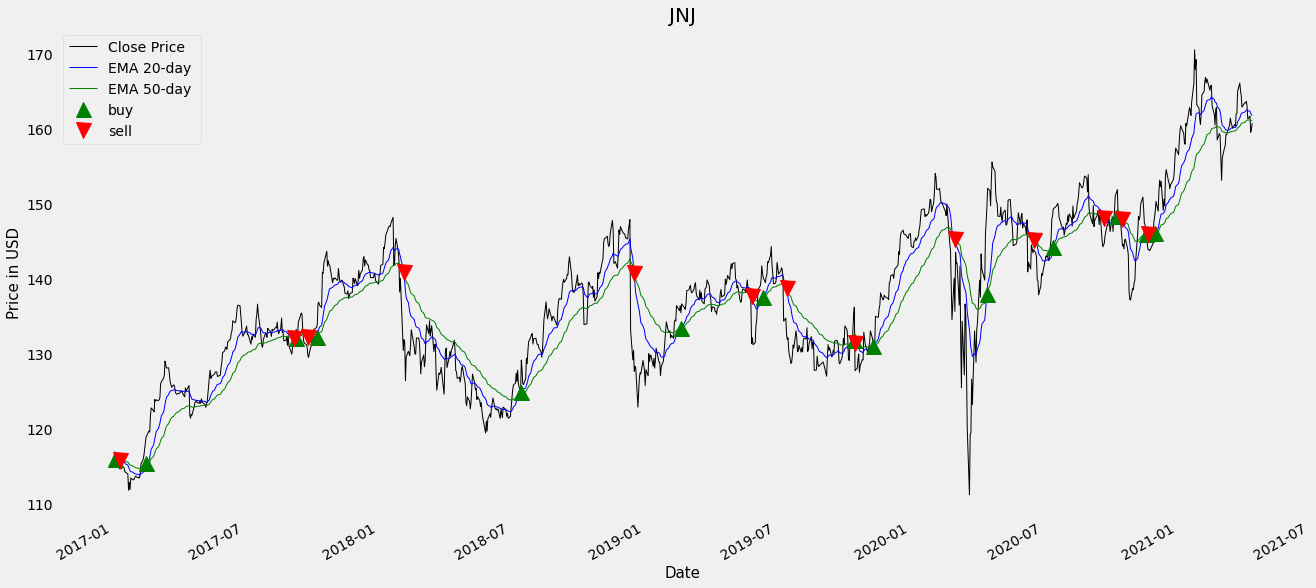

In [77]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df2_JNJ['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df2_JNJ['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df2_JNJ['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df2_JNJ[df2_JNJ['Position'] == 1].index, 
         df2_JNJ['EMA20'][df2_JNJ['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df2_JNJ[df2_JNJ['Position'] == -1].index, 
         df2_JNJ['EMA50'][df2_JNJ['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## FB prophet

In [78]:
df = wb.DataReader('JNJ', data_source='yahoo', start='2017-1-1')

In [79]:
df=df.reset_index()
df

Date        High         Low        Open       Close      Volume  \
0    2017-01-03  116.000000  115.230003  115.779999  115.839996   5953000.0   
1    2017-01-04  116.230003  115.309998  115.500000  115.650002   5828900.0   
2    2017-01-05  116.970001  115.440002  116.000000  116.860001   6217200.0   
3    2017-01-06  117.000000  115.760002  116.669998  116.300003   5221400.0   
4    2017-01-09  116.610001  115.889999  116.349998  116.279999   5457500.0   
...         ...         ...         ...         ...         ...         ...   
1073 2021-04-09  162.929993  159.779999  162.119995  161.250000   8411500.0   
1074 2021-04-12  162.080002  160.339996  161.089996  161.639999   5022800.0   
1075 2021-04-13  159.929993  156.529999  156.860001  159.479996  18424100.0   
1076 2021-04-14  160.110001  157.539993  157.830002  159.919998   7714900.0   
1077 2021-04-15  162.389999  160.229996  160.720001  160.690002   6183619.0   

       Adj Close  
0     103.436539  
1     103.266876  
2     104.347321  
3     103.847282  
4     103.829422  
...          ...  
1073  161.250000  
1074  161.639999  
1075  159.479996  
1076  159.919998  
1077  160.690002  

[1078 rows x 7 columns]

In [80]:
a='2021-02-01'

In [81]:
df_train=df[df['Date'] < a]

In [82]:
df_train.tail()

Date        High         Low        Open       Close      Volume  \
1021 2021-01-25  166.089996  163.660004  165.009995  165.979996   9924400.0   
1022 2021-01-26  173.649994  169.389999  169.699997  170.479996  14205700.0   
1023 2021-01-27  170.919998  167.449997  169.119995  167.880005  14207300.0   
1024 2021-01-28  170.860001  167.800003  168.199997  169.160004   8944400.0   
1025 2021-01-29  166.000000  160.550003  164.259995  163.130005  22468800.0   

       Adj Close  
1021  164.951401  
1022  169.423508  
1023  166.839630  
1024  168.111710  
1025  162.119080

In [83]:
start_date='2021-02-01'
end_date='2021-04-01'

In [84]:
df_test =df[(df['Date'] > start_date) & (df['Date'] <= end_date)]

In [85]:
df_test

Date        High         Low        Open       Close      Volume  \
1027 2021-02-02  163.660004  161.179993  163.380005  161.250000  11443300.0   
1028 2021-02-03  161.520004  159.570007  160.940002  160.500000   8601900.0   
1029 2021-02-04  162.089996  159.759995  161.000000  161.990005   7758100.0   
1030 2021-02-05  165.440002  163.860001  164.860001  164.449997   9484600.0   
1031 2021-02-08  165.919998  163.880005  165.029999  164.919998   6035300.0   
1032 2021-02-09  166.589996  164.970001  165.199997  166.270004   5544200.0   
1033 2021-02-10  167.940002  165.699997  167.889999  166.809998   5921300.0   
1034 2021-02-11  167.380005  165.600006  167.000000  166.059998   4868300.0   
1035 2021-02-12  166.850006  164.000000  164.399994  166.580002   4411300.0   
1036 2021-02-16  167.050003  164.639999  166.580002  165.070007   5656100.0   
1037 2021-02-17  166.089996  164.360001  164.970001  165.660004   6676700.0   
1038 2021-02-18  166.160004  164.300003  164.960007  165.740005   5189100.0   
1039 2021-02-19  165.960007  162.910004  165.600006  162.979996   8190900.0   
1040 2021-02-22  162.539993  160.289993  161.869995  161.869995   6447100.0   
1041 2021-02-23  163.190002  160.399994  161.479996  160.440002   7042800.0   
1042 2021-02-24  164.389999  160.919998  162.399994  162.589996  10286100.0   
1043 2021-02-25  163.699997  161.990005  163.130005  162.759995   9719700.0   
1044 2021-02-26  162.410004  157.970001  162.000000  158.460007  14356800.0   
1045 2021-03-01  161.529999  159.089996  161.449997  159.320007  10539500.0   
1046 2021-03-02  160.779999  158.600006  159.779999  159.020004   7605800.0   
1047 2021-03-03  158.899994  156.059998  158.250000  156.220001   8489900.0   
1048 2021-03-04  156.100006  151.470001  155.990005  153.070007  11010800.0   
1049 2021-03-05  156.690002  153.130005  153.979996  156.100006   8328000.0   
1050 2021-03-08  159.330002  155.979996  157.000000  157.399994   6544200.0   
1051 2021-03-09  160.750000  156.889999  156.889999  157.699997   7450700.0   
1052 2021-03-10  159.899994  157.360001  158.820007  159.149994   6632600.0   
1053 2021-03-11  160.630005  158.919998  159.539993  159.139999   6300900.0   
1054 2021-03-12  160.309998  159.190002  159.279999  159.600006   5473300.0   
1055 2021-03-15  160.660004  158.500000  159.750000  160.419998   5524100.0   
1056 2021-03-16  161.679993  160.240005  160.460007  161.369995   6363800.0   
1057 2021-03-17  161.729996  159.529999  160.830002  160.770004   5928700.0   
1058 2021-03-18  161.490005  159.960007  160.210007  160.470001   4800000.0   
1059 2021-03-19  161.500000  159.470001  160.690002  160.039993  14884500.0   
1060 2021-03-22  160.649994  158.000000  158.309998  160.500000   7544100.0   
1061 2021-03-23  161.199997  158.880005  160.210007  160.350006   7178300.0   
1062 2021-03-24  162.479996  159.820007  160.100006  161.910004   6370100.0   
1063 2021-03-25  162.449997  160.639999  162.440002  161.970001   6269800.0   
1064 2021-03-26  165.100006  161.380005  162.089996  164.929993   7617900.0   
1065 2021-03-29  167.029999  163.630005  163.830002  166.039993   8535100.0   
1066 2021-03-30  165.660004  164.229996  165.020004  165.009995   7236300.0   
1067 2021-03-31  165.389999  163.699997  164.960007  164.350006   8281500.0   
1068 2021-04-01  163.839996  162.259995  162.600006  162.830002   7226600.0   

       Adj Close  
1027  160.250717  
1028  159.505371  
1029  160.986145  
1030  163.430878  
1031  163.897980  
1032  165.239609  
1033  165.776260  
1034  165.030914  
1035  165.547684  
1036  164.047058  
1037  164.633392  
1038  164.712906  
1039  161.969986  
1040  161.869995  
1041  160.440002  
1042  162.589996  
1043  162.759995  
1044  158.460007  
1045  159.320007  
1046  159.020004  
1047  156.220001  
1048  153.070007  
1049  156.100006  
1050  157.399994  
1051  157.699997  
1052  159.149994  
1053  159.139999  
1054  159.600006  
1055  160.419998  
1056  161.369995  
1057  160.770004  
1058 

In [86]:
df.describe()

High          Low         Open        Close        Volume  \
count  1078.000000  1078.000000  1078.000000  1078.000000  1.078000e+03   
mean    138.648432   136.527941   137.609406   137.610501  7.234116e+06   
std      11.131234    10.958068    11.045796    11.024941  3.565527e+06   
min     112.800003   109.160004   111.930000   111.139999  2.114900e+06   
25%     131.192501   129.002499   130.002499   130.122501  5.260575e+06   
50%     138.245003   135.830002   136.995003   137.090004  6.435800e+06   
75%     146.194996   143.905003   145.265007   145.182507  8.057950e+06   
max     173.649994   169.389999   169.699997   170.479996  5.814020e+07   

         Adj Close  
count  1078.000000  
mean    130.319344  
std      14.053798  
min      99.793396  
25%     120.359137  
50%     128.382355  
75%     140.549553  
max     169.423508

In [87]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
#df_train=df_train.reset_index()
df_train[['ds','y']]= df_train[['Date','Close']]

In [88]:
df_train

Date        High         Low        Open       Close      Volume  \
0    2017-01-03  116.000000  115.230003  115.779999  115.839996   5953000.0   
1    2017-01-04  116.230003  115.309998  115.500000  115.650002   5828900.0   
2    2017-01-05  116.970001  115.440002  116.000000  116.860001   6217200.0   
3    2017-01-06  117.000000  115.760002  116.669998  116.300003   5221400.0   
4    2017-01-09  116.610001  115.889999  116.349998  116.279999   5457500.0   
...         ...         ...         ...         ...         ...         ...   
1021 2021-01-25  166.089996  163.660004  165.009995  165.979996   9924400.0   
1022 2021-01-26  173.649994  169.389999  169.699997  170.479996  14205700.0   
1023 2021-01-27  170.919998  167.449997  169.119995  167.880005  14207300.0   
1024 2021-01-28  170.860001  167.800003  168.199997  169.160004   8944400.0   
1025 2021-01-29  166.000000  160.550003  164.259995  163.130005  22468800.0   

       Adj Close         ds           y  
0     103.436539 2017-01-03  115.839996  
1     103.266876 2017-01-04  115.650002  
2     104.347321 2017-01-05  116.860001  
3     103.847282 2017-01-06  116.300003  
4     103.829422 2017-01-09  116.279999  
...          ...        ...         ...  
1021  164.951401 2021-01-25  165.979996  
1022  169.423508 2021-01-26  170.479996  
1023  166.839630 2021-01-27  167.880005  
1024  168.111710 2021-01-28  169.160004  
1025  162.119080 2021-01-29  163.130005  

[1026 rows x 9 columns]

In [89]:
model=Prophet()

In [90]:
# drop the columans
prophet_df=df_train.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [91]:
prophet_df.reset_index(drop=True,inplace=True)

In [92]:
prophet_df

ds           y
0    2017-01-03  115.839996
1    2017-01-04  115.650002
2    2017-01-05  116.860001
3    2017-01-06  116.300003
4    2017-01-09  116.279999
...         ...         ...
1021 2021-01-25  165.979996
1022 2021-01-26  170.479996
1023 2021-01-27  167.880005
1024 2021-01-28  169.160004
1025 2021-01-29  163.130005

[1026 rows x 2 columns]

In [93]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
future=model.make_future_dataframe(periods=62)

In [95]:
future.tail(5)

ds
1083 2021-03-28
1084 2021-03-29
1085 2021-03-30
1086 2021-03-31
1087 2021-04-01

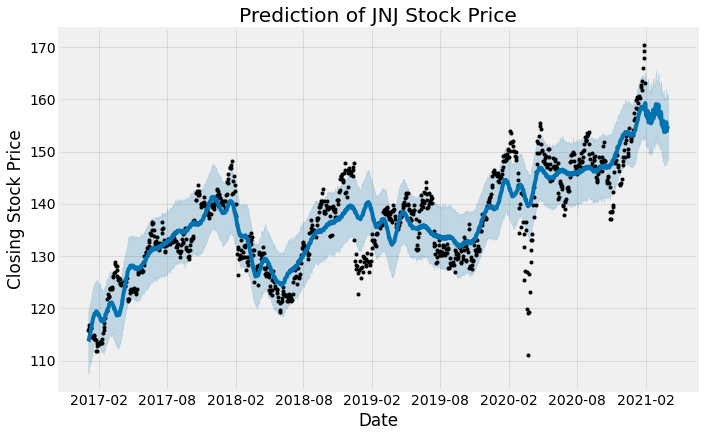

ds        yhat  yhat_lower  yhat_upper
1083 2021-03-28  155.599608  149.426405  161.761593
1084 2021-03-29  153.915654  147.696461  160.115292
1085 2021-03-30  154.497508  148.493922  160.624046
1086 2021-03-31  154.560770  148.169397  161.117594
1087 2021-04-01  154.846320  148.744996  160.762718

In [96]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of JNJ Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

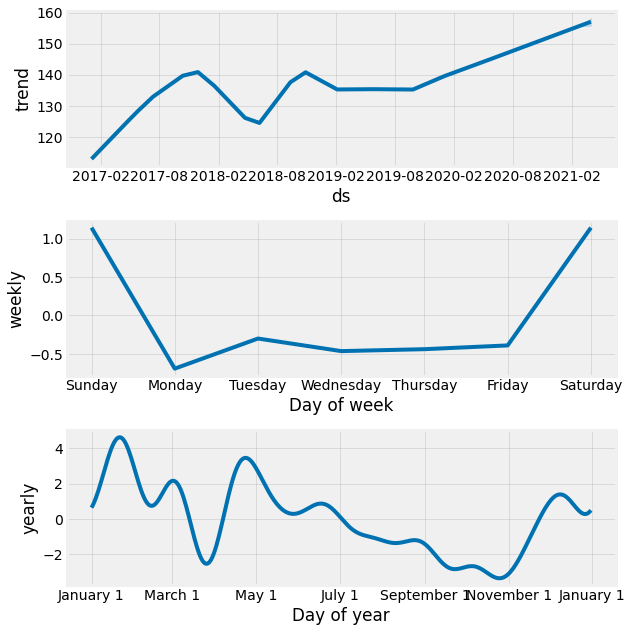

In [97]:
model.plot_components(predictions)
plt.show()

In [98]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2017-01-03  113.647565  107.736772  119.324328
1 2017-01-04  113.787230  107.756441  119.426939
2 2017-01-05  114.136068  108.262612  119.893722
3 2017-01-06  114.526930  108.449524  120.455056
4 2017-01-09  115.324343  109.838608  121.526712

In [99]:
df_test.head()

Date        High         Low        Open       Close      Volume  \
1027 2021-02-02  163.660004  161.179993  163.380005  161.250000  11443300.0   
1028 2021-02-03  161.520004  159.570007  160.940002  160.500000   8601900.0   
1029 2021-02-04  162.089996  159.759995  161.000000  161.990005   7758100.0   
1030 2021-02-05  165.440002  163.860001  164.860001  164.449997   9484600.0   
1031 2021-02-08  165.919998  163.880005  165.029999  164.919998   6035300.0   

       Adj Close  
1027  160.250717  
1028  159.505371  
1029  160.986145  
1030  163.430878  
1031  163.897980

In [100]:
df_test['predictions']=predictions['yhat']

In [101]:
df_test.head()

Date        High         Low        Open       Close      Volume  \
1027 2021-02-02  163.660004  161.179993  163.380005  161.250000  11443300.0   
1028 2021-02-03  161.520004  159.570007  160.940002  160.500000   8601900.0   
1029 2021-02-04  162.089996  159.759995  161.000000  161.990005   7758100.0   
1030 2021-02-05  165.440002  163.860001  164.860001  164.449997   9484600.0   
1031 2021-02-08  165.919998  163.880005  165.029999  164.919998   6035300.0   

       Adj Close  predictions  
1027  160.250717   159.056674  
1028  159.505371   156.998495  
1029  160.986145   157.163157  
1030  163.430878   156.773800  
1031  163.897980   156.579349

(array([737822., 737829., 737836., 737843., 737850., 737857., 737864.,
        737871., 737881.]), <a list of 9 Text major ticklabel objects>)

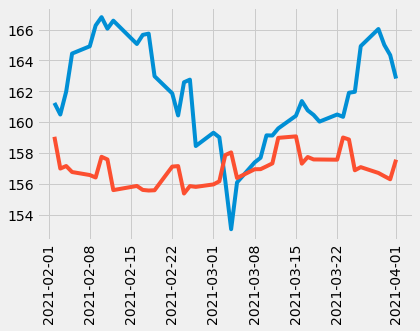

In [102]:
plt.plot(df_test['Date'],df_test['Close'])
plt.plot(df_test['Date'],df_test['predictions'])
plt.xticks(rotation=90)

# LSTM

In [103]:
from sklearn.preprocessing import MinMaxScaler


In [104]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("JNJ", start="2017-01-01")

In [105]:
df.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2017-01-03  116.000000  115.230003  115.779999  115.839996  5953000.0   
2017-01-04  116.230003  115.309998  115.500000  115.650002  5828900.0   
2017-01-05  116.970001  115.440002  116.000000  116.860001  6217200.0   
2017-01-06  117.000000  115.760002  116.669998  116.300003  5221400.0   
2017-01-09  116.610001  115.889999  116.349998  116.279999  5457500.0   

             Adj Close  
Date                    
2017-01-03  103.436539  
2017-01-04  103.266876  
2017-01-05  104.347321  
2017-01-06  103.847282  
2017-01-09  103.829422

In [106]:
df.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-04-09  162.929993  159.779999  162.119995  161.250000   8411500.0   
2021-04-12  162.080002  160.339996  161.089996  161.639999   5022800.0   
2021-04-13  159.929993  156.529999  156.860001  159.479996  18424100.0   
2021-04-14  160.110001  157.539993  157.830002  159.919998   7714900.0   
2021-04-15  162.389999  160.229996  160.720001  160.690002   6183619.0   

             Adj Close  
Date                    
2021-04-09  161.250000  
2021-04-12  161.639999  
2021-04-13  159.479996  
2021-04-14  159.919998  
2021-04-15  160.690002

In [107]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1078, 1)


array([[115.77999878],
       [115.5       ],
       [116.        ],
       [116.66999817],
       [116.34999847]])

In [108]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [109]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.08822177],
       [0.08180566],
       [0.09326304],
       [0.10861588],
       [0.10128317]])

In [110]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.19798346],
       [0.22273143],
       [0.37878102],
       [0.52841433],
       [0.36136558]])

In [111]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [112]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.08822177, 0.08180566, 0.09326304, 0.10861588, 0.10128317,
        0.09395045, 0.09509626, 0.05362044, 0.06897346, 0.0460587 ,
        0.06736943, 0.06301557, 0.05866171, 0.05912011, 0.02245654,
        0.        , 0.00160403, 0.00160403, 0.03368472, 0.0197067 ,
        0.01260318, 0.02039412, 0.03597616, 0.03505954, 0.0382676 ,
        0.03139328, 0.03368472, 0.05476625, 0.07676439, 0.08043083,
        0.0909716 , 0.11617779, 0.14344641, 0.14825848, 0.1684234 ,
        0.17392289, 0.21929418, 0.23373041, 0.23098076, 0.24197974,
        0.27085238, 0.26810255, 0.25389551, 0.24404216, 0.27085238,
        0.28987167, 0.32332718, 0.31851511, 0.34211728, 0.34647113]])

In [113]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.19798346, 0.22273143, 0.37878102, 0.52841433, 0.36136558,
        0.39390449, 0.46860681, 0.57470188, 0.64000907, 0.59165893,
        0.73510516, 0.64321712, 0.76741504, 0.77039407, 0.83363867,
        0.91796514, 0.89367521, 0.87511431, 0.93675506, 0.96975236,
        1.        , 0.98258456, 0.9010081 , 0.90398713, 0.83707609,
        0.86365694, 0.84417961, 0.8494499 , 0.87236466, 0.85792825,
        0.84761668, 0.83684672, 0.87465627, 0.78253886, 0.76672763,
        0.82355612, 0.92942252, 0.87465627, 0.86663597, 0.83799253,
        0.74793771, 0.7850595 , 0.74220902, 0.78116403, 0.82561871,
        0.81026552, 0.80499522, 0.83845092, 0.79903751, 0.81943163]])

In [114]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [115]:
#Import all deep learing learning library to create LSTM model
#import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [116]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [117]:
model.add(Dense(units=1))

In [118]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [119]:
#Fit the model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 812 samples
Epoch 1/5
812/812 [==============================] - 30s 38ms/sample - loss: 0.0609
Epoch 2/5
812/812 [==============================] - 9s 12ms/sample - loss: 0.0185
Epoch 3/5
812/812 [==============================] - 10s 12ms/sample - loss: 0.0142
Epoch 4/5
812/812 [==============================] - 10s 12ms/sample - loss: 0.0126
Epoch 5/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0109


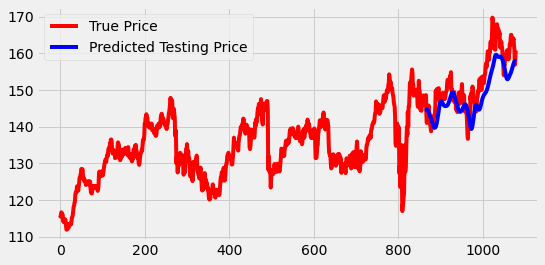

In [120]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

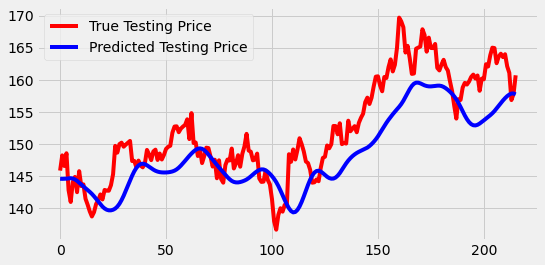

In [121]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [122]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[157.74445, 161.7422, 170.86441, 183.32162, 196.5111]


# Moderna, Inc - MRNA

In [123]:
myticker ='MRNA'
df = web.DataReader([myticker], 'yahoo', start='2017-1-1')['Close']
df.columns = {'Close Price'}
df.head(10)

Close Price
Date                   
2018-12-07    18.600000
2018-12-10    18.799999
2018-12-11    18.010000
2018-12-12    18.680000
2018-12-13    18.760000
2018-12-14    18.320000
2018-12-17    17.000000
2018-12-18    17.000000
2018-12-19    16.180000
2018-12-20    15.500000

In [124]:
df.tail()

Close Price
Date                   
2021-04-09   140.919998
2021-04-12   139.399994
2021-04-13   149.710007
2021-04-14   160.029999
2021-04-15   159.869995

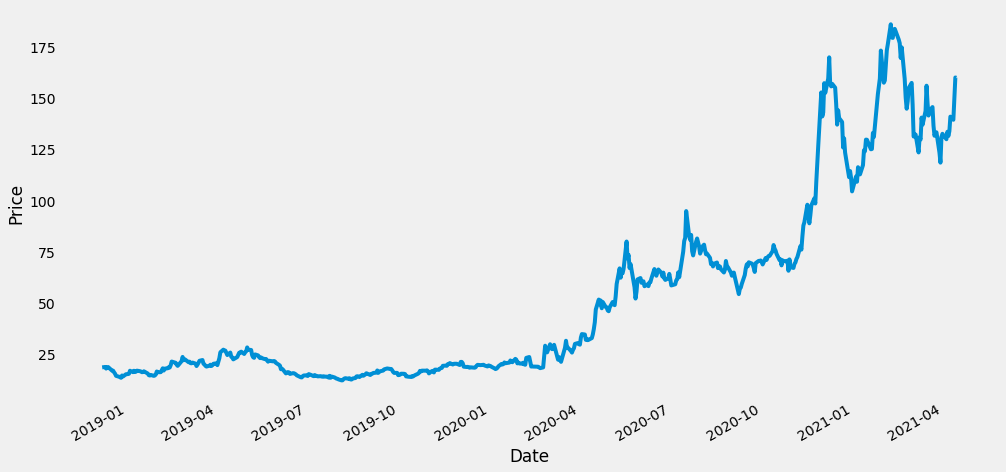

In [125]:
df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

## Moving Average

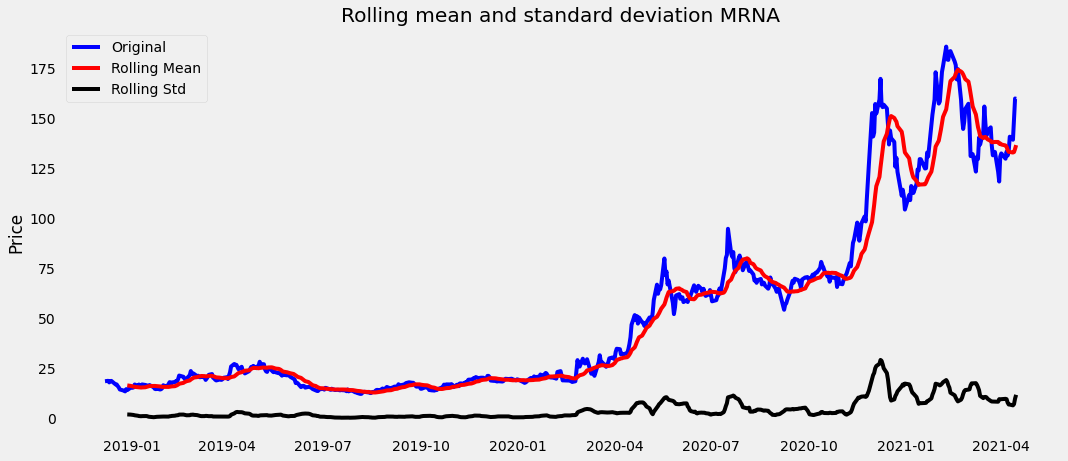

In [126]:
rolling_mean = df['Close Price'].rolling(15).mean()
rolling_std = df['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [127]:
# create 20 days simple moving average column
df['SMA20'] = df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

Close Price    SMA20    SMA50
Date                                     
2018-12-07    18.600000  18.6000  18.6000
2018-12-10    18.799999  18.7000  18.7000
2018-12-11    18.010000  18.4700  18.4700
2018-12-12    18.680000  18.5225  18.5225
2018-12-13    18.760000  18.5700  18.5700

In [128]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [129]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Close Price    SMA20    SMA50  Signal  Position
Date                                                       
2018-12-07    18.600000  18.6000  18.6000     0.0       NaN
2018-12-10    18.799999  18.7000  18.7000     0.0       0.0
2018-12-11    18.010000  18.4700  18.4700     0.0       0.0
2018-12-12    18.680000  18.5225  18.5225     0.0       0.0
2018-12-13    18.760000  18.5700  18.5700     0.0       0.0

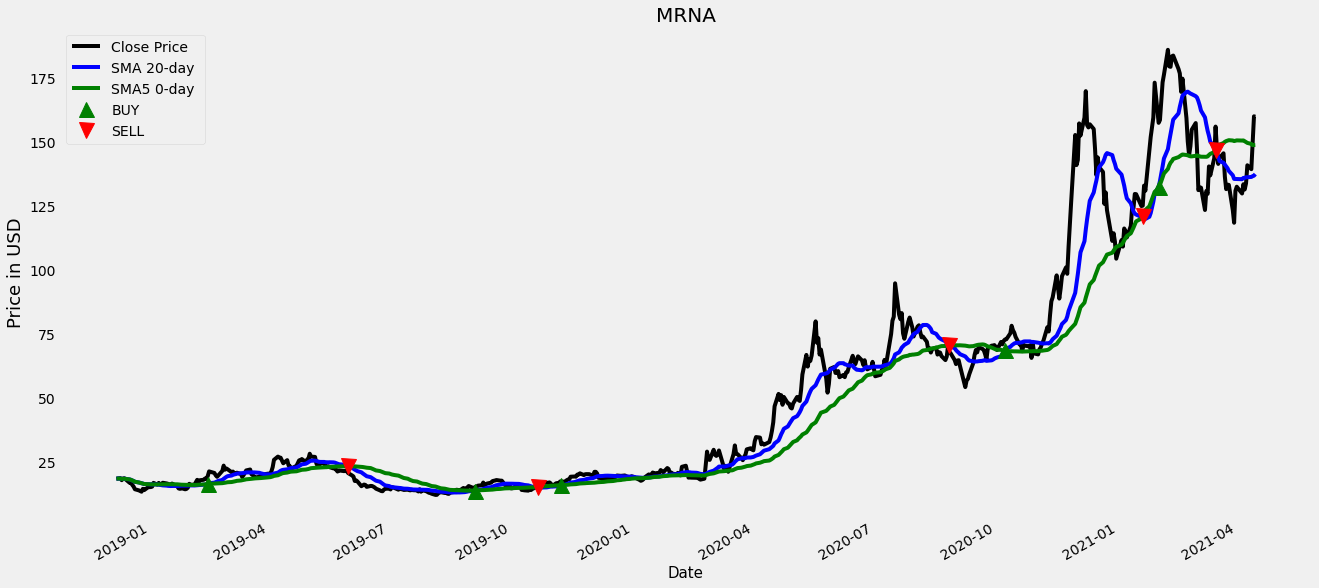

In [130]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', label= 'Close Price') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [131]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |    SMA20 |    SMA50 |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2019-02-14 00:00:00 |         19.66 |  16.5805 |  16.4885 |        1 | Buy        |
| 2019-05-31 00:00:00 |         20.78 |  23.2135 |  23.4134 |        0 | Sell       |
| 2019-09-04 00:00:00 |         15.42 |  13.9825 |  13.977  |        1 | Buy        |
| 2019-10-21 00:00:00 |         15.5  |  15.1933 |  15.2799 |        0 | Sell       |
| 2019-11-08 00:00:00 |         17.49 |  16.103  |  16.0909 |        1 | Buy        |
| 2020-08-27 00:00:00 |         68.03 |  70.5195 |  70.6177 |        0 | Sell       |
| 2020-10-08 00:00:00 |         72.93 |  68.761  |  68.398  |        1 | Buy        |
| 2021-01-20 00:00:00 |        125.14 | 119.985  | 121.208  |        0 | Sell       |
| 2021-02-01 00:00:00 |        157.48 | 132.462  | 131

## Exponential Smoothing

In [132]:
df['EMA20'] = df['Close Price'].ewm(span = 20, adjust = False).mean()

In [133]:
df['EMA50'] = df['Close Price'].ewm(span = 50, adjust = False).mean()

In [134]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [135]:
df['Position'] = df['Signal'].diff()

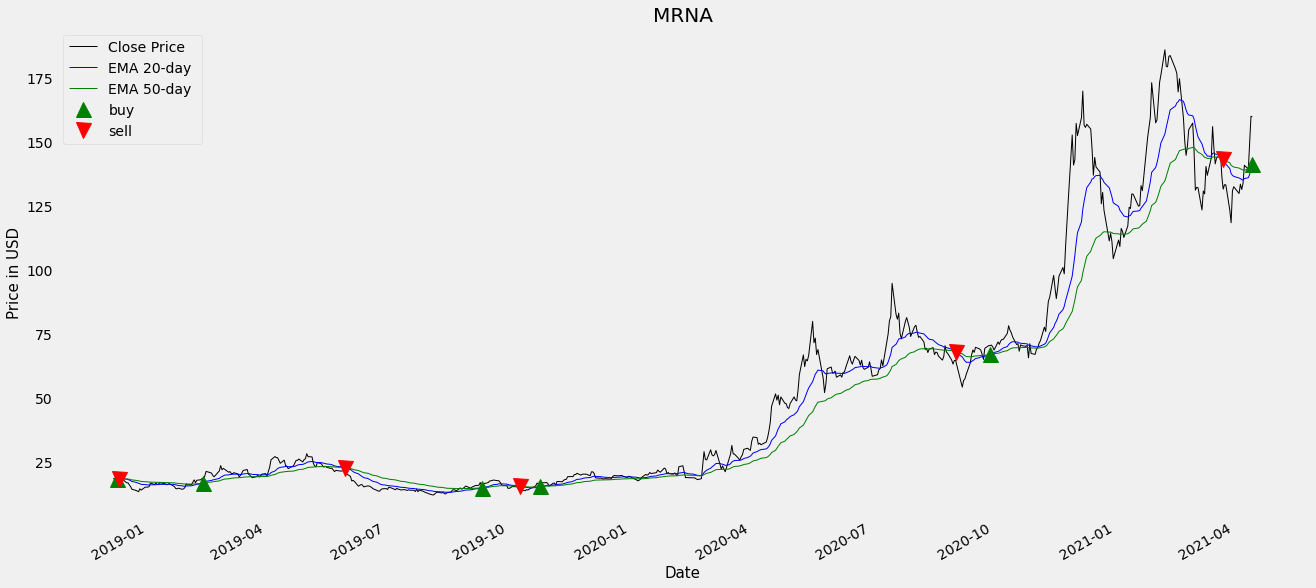

In [136]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [137]:

df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+----------+----------+----------+------------+----------+----------+
| Date                |   Close Price |    SMA20 |    SMA50 |   Signal | Position   |    EMA20 |    EMA50 |
|---------------------+---------------+----------+----------+----------+------------+----------+----------|
| 2018-12-10 00:00:00 |         18.8  |  18.7    |  18.7    |        1 | Buy        |  18.619  |  18.6078 |
| 2018-12-11 00:00:00 |         18.01 |  18.47   |  18.47   |        0 | Sell       |  18.561  |  18.5844 |
| 2019-02-13 00:00:00 |         18.53 |  16.4105 |  16.4196 |        1 | Buy        |  16.9452 |  16.8552 |
| 2019-05-31 00:00:00 |         20.78 |  23.2135 |  23.4134 |        0 | Sell       |  22.7499 |  22.8424 |
| 2019-09-11 00:00:00 |         15.92 |  14.7205 |  14.1624 |        1 | Buy        |  15.0499 |  15.0346 |
| 2019-10-10 00:00:00 |         14.16 |  16.2775 |  15.0468 |        0 | Sell       |  15.5868 |  15.6009 |
| 2019-10-25 00:00:00 |     

### FBPROPHET

In [138]:
df = wb.DataReader('MRNA', data_source='yahoo', start='2017-1-1')

In [139]:
df=df.reset_index()
df

Date        High         Low        Open       Close    Volume  \
0   2018-12-07   22.750000   18.510000   22.000000   18.600000  12995600   
1   2018-12-10   19.438999   18.000000   18.900000   18.799999   4233300   
2   2018-12-11   20.660000   17.990000   20.549999   18.010000   3435300   
3   2018-12-12   19.480000   18.020000   18.549999   18.680000   2590700   
4   2018-12-13   19.290001   18.680000   19.250000   18.760000   1608600   
..         ...         ...         ...         ...         ...       ...   
587 2021-04-09  144.000000  133.339996  133.509995  140.919998   9907800   
588 2021-04-12  143.490005  136.360001  142.369995  139.399994   6060200   
589 2021-04-13  152.110001  145.350006  146.800003  149.710007  13729000   
590 2021-04-14  160.919998  152.490005  153.660004  160.029999  15252000   
591 2021-04-15  163.580002  155.229996  159.000000  159.869995  10239277   

      Adj Close  
0     18.600000  
1     18.799999  
2     18.010000  
3     18.680000  
4     18.760000  
..          ...  
587  140.919998  
588  139.399994  
589  149.710007  
590  160.029999  
591  159.869995  

[592 rows x 7 columns]

In [140]:
a='2021-02-01'

In [141]:
df_train=df[df['Date'] < a]
df_train.tail()

Date        High         Low        Open       Close    Volume  \
535 2021-01-25  147.429993  137.250000  138.399994  147.000000  26970900   
536 2021-01-26  154.550003  145.000000  145.149994  151.929993  16964700   
537 2021-01-27  164.550003  149.000000  151.199997  155.729996  20262900   
538 2021-01-28  168.000000  153.619995  154.104996  159.550003  16497400   
539 2021-01-29  185.979996  166.199997  174.990005  173.160004  39687300   

      Adj Close  
535  147.000000  
536  151.929993  
537  155.729996  
538  159.550003  
539  173.160004

In [142]:
start_date='2021-02-01'
end_date='2021-04-01'

In [143]:
df_test =df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
df_test

Date        High         Low        Open       Close    Volume  \
541 2021-02-02  159.054001  147.100006  158.520004  158.580002  14923900   
542 2021-02-03  168.389999  156.399994  156.600006  165.860001  11355900   
543 2021-02-04  173.729996  164.250000  166.419998  173.309998  10618300   
544 2021-02-05  177.500000  170.259995  170.990005  176.240005   8976900   
545 2021-02-08  189.259995  176.809998  177.000000  185.979996  12927400   
546 2021-02-09  187.000000  177.270004  186.210007  179.520004   8403100   
547 2021-02-10  185.220001  176.369995  182.740005  179.339996   7067500   
548 2021-02-11  184.220001  176.199997  178.289993  183.440002   5432200   
549 2021-02-12  185.000000  177.580002  184.889999  183.740005   5695400   
550 2021-02-16  184.179993  173.509003  182.410004  178.529999   6917500   
551 2021-02-17  178.009995  171.619995  174.279999  176.759995   6554600   
552 2021-02-18  175.470001  168.000000  171.593002  169.570007   5124100   
553 2021-02-19  179.300003  170.529999  173.539993  174.740005   6413600   
554 2021-02-22  170.350006  158.580002  167.800003  159.369995  11152700   
555 2021-02-23  153.000000  136.000000  151.250000  150.169998  15509200   
556 2021-02-24  151.000000  143.470001  150.410004  144.789993   9757200   
557 2021-02-25  160.979996  145.860001  150.779999  148.380005  15172100   
558 2021-02-26  159.600006  150.880005  157.979996  154.809998  13445200   
559 2021-03-01  157.779999  145.250000  154.462997  157.399994  15337200   
560 2021-03-02  154.470993  146.440002  153.500000  146.809998   8611100   
561 2021-03-03  147.320007  131.000000  146.089996  131.220001  13659800   
562 2021-03-04  135.470001  126.690002  128.699997  132.300003  10914600   
563 2021-03-05  134.270004  121.120003  133.072998  132.190002  12030800   
564 2021-03-08  133.550003  122.480003  129.149994  123.470001   6790100   
565 2021-03-09  132.300003  125.599998  127.110001  130.869995   7825900   
566 2021-03-10  135.714996  128.792999  133.619995  129.750000   5551200   
567 2021-03-11  140.850006  131.479996  132.981995  140.470001   8064100   
568 2021-03-12  138.742004  133.199997  134.039993  136.990005   4873900   
569 2021-03-15  143.850006  135.009995  136.770004  143.660004   7321700   
570 2021-03-16  157.750000  145.839996  148.500000  156.020004  16913200   
571 2021-03-17  152.082993  143.250000  150.250000  147.550003  12858800   
572 2021-03-18  147.610001  140.860001  144.449997  141.460007   7135600   
573 2021-03-19  145.179993  138.529999  143.059998  143.740005   6922300   
574 2021-03-22  147.919998  141.850006  144.190002  145.600006   6050700   
575 2021-03-23  146.190002  136.380005  145.610001  136.520004   6961200   
576 2021-03-24  137.740005  131.009995  137.250000  131.610001   5864600   
577 2021-03-25  134.309998  126.419998  127.330002  133.330002   5696300   
578 2021-03-26  135.600006  128.020004  133.380005  133.279999   4017600   
579 2021-03-29  131.300003  121.900002  130.110001  123.419998  10814800   
580 2021-03-30  123.598000  117.341003  123.150002  118.489998  11061600   
581 2021-03-31  131.800003  119.328003  121.099998  130.949997  10015700   
582 2021-04-01  136.636993  130.339996  132.199997  132.550003   7269700   

      Adj Close  
541  158.580002  
542  165.860001  
543  173.309998  
544  176.240005  
545  185.979996  
546  179.520004  
547  179.339996  
548  183.440002  
549  183.740005  
550  178.529999  
551  176.759995  
552  169.570007  
553  174.740005  
554  159.369995  
555  150.169998  
556  144.789993  
557  148.380005  
558  154.809998  
559  157.399994  
560  146.809998  
561  131.220001  
562  132.300003  
563  132.190002  
564  123.470001  
565  130.869995  
566  129.750000  
567  140.470001  
568  136.990005  
569  143.660004  
570  156.020004  
571  147.550003  
572  141.460007  
573  143.740005  
574  145.600006  
575  136.520004  
576  131.610001  
577  133.330002  
578  133.279999  
579  123.419998  
580  118.489998  
581

In [144]:
df.describe()

High         Low        Open       Close        Volume  \
count  592.000000  592.000000  592.000000  592.000000  5.920000e+02   
mean    53.971934   50.296199   52.247767   52.184603  1.001189e+07   
std     47.695292   44.391539   46.137391   46.125462  1.448091e+07   
min     12.690000   11.540000   12.260000   12.260000  2.728000e+05   
25%     18.467499   17.607501   17.997500   17.987500  1.202450e+06   
50%     26.224999   23.945000   25.140000   25.434999  4.797950e+06   
75%     72.852497   68.802502   70.545000   70.772499  1.315895e+07   
max    189.259995  177.580002  186.210007  185.979996  1.255523e+08   

        Adj Close  
count  592.000000  
mean    52.184603  
std     46.125462  
min     12.260000  
25%     17.987500  
50%     25.434999  
75%     70.772499  
max    185.979996

In [145]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
#df_train=df_train.reset_index()
df_train[['ds','y']]= df_train[['Date','Close']]
df_train

Date        High         Low        Open       Close    Volume  \
0   2018-12-07   22.750000   18.510000   22.000000   18.600000  12995600   
1   2018-12-10   19.438999   18.000000   18.900000   18.799999   4233300   
2   2018-12-11   20.660000   17.990000   20.549999   18.010000   3435300   
3   2018-12-12   19.480000   18.020000   18.549999   18.680000   2590700   
4   2018-12-13   19.290001   18.680000   19.250000   18.760000   1608600   
..         ...         ...         ...         ...         ...       ...   
535 2021-01-25  147.429993  137.250000  138.399994  147.000000  26970900   
536 2021-01-26  154.550003  145.000000  145.149994  151.929993  16964700   
537 2021-01-27  164.550003  149.000000  151.199997  155.729996  20262900   
538 2021-01-28  168.000000  153.619995  154.104996  159.550003  16497400   
539 2021-01-29  185.979996  166.199997  174.990005  173.160004  39687300   

      Adj Close         ds           y  
0     18.600000 2018-12-07   18.600000  
1     18.799999 2018-12-10   18.799999  
2     18.010000 2018-12-11   18.010000  
3     18.680000 2018-12-12   18.680000  
4     18.760000 2018-12-13   18.760000  
..          ...        ...         ...  
535  147.000000 2021-01-25  147.000000  
536  151.929993 2021-01-26  151.929993  
537  155.729996 2021-01-27  155.729996  
538  159.550003 2021-01-28  159.550003  
539  173.160004 2021-01-29  173.160004  

[540 rows x 9 columns]

In [146]:
model=Prophet()

In [147]:
# drop the columans
prophet_df=df_train.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [148]:
prophet_df.reset_index(drop=True,inplace=True)

In [149]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [150]:
future=model.make_future_dataframe(periods=62)

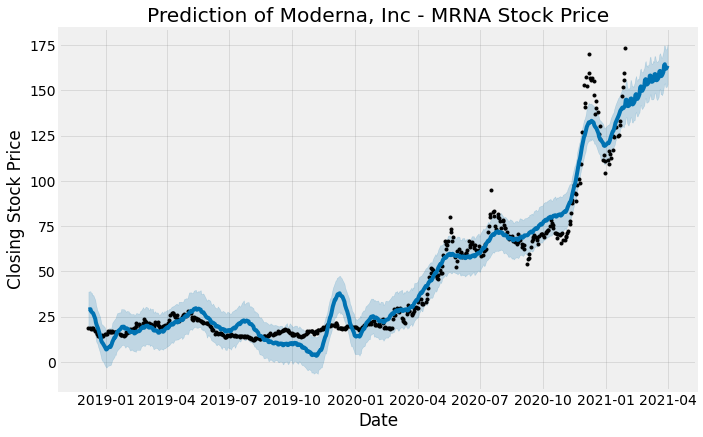

ds        yhat  yhat_lower  yhat_upper
597 2021-03-28  164.441492  153.972889  174.665890
598 2021-03-29  162.187025  151.933055  172.698106
599 2021-03-30  161.986353  151.808446  172.619596
600 2021-03-31  162.678671  152.138980  173.054067
601 2021-04-01  163.642564  153.365833  175.329957

In [151]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Moderna, Inc - MRNA Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

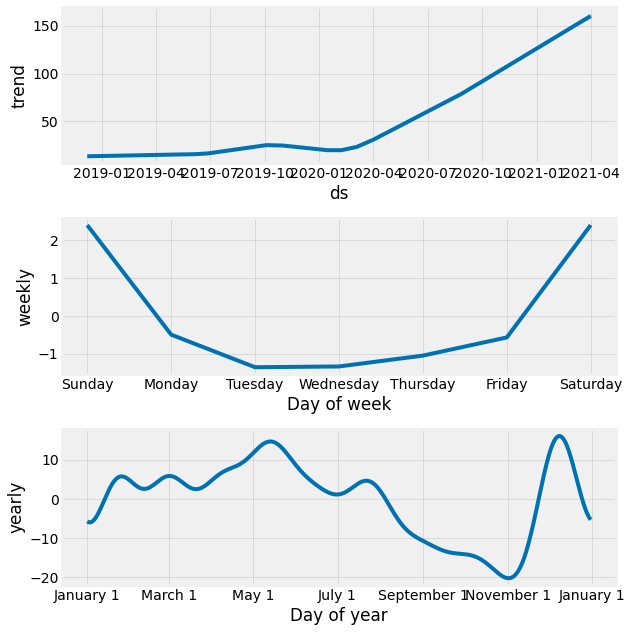

In [152]:
model.plot_components(predictions)
plt.show()

In [153]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2018-12-07  28.945326   19.796647   38.936065
1 2018-12-10  29.126457   18.278973   39.095762
2 2018-12-11  27.951094   18.558672   37.941530
3 2018-12-12  27.492018   17.384546   37.460478
4 2018-12-13  27.141689   17.790023   36.983708

In [154]:
df_test.head()

Date        High         Low        Open       Close    Volume  \
541 2021-02-02  159.054001  147.100006  158.520004  158.580002  14923900   
542 2021-02-03  168.389999  156.399994  156.600006  165.860001  11355900   
543 2021-02-04  173.729996  164.250000  166.419998  173.309998  10618300   
544 2021-02-05  177.500000  170.259995  170.990005  176.240005   8976900   
545 2021-02-08  189.259995  176.809998  177.000000  185.979996  12927400   

      Adj Close  
541  158.580002  
542  165.860001  
543  173.309998  
544  176.240005  
545  185.979996

In [155]:
df_test['predictions']=predictions['yhat']

In [156]:
df_test.head()

Date        High         Low        Open       Close    Volume  \
541 2021-02-02  159.054001  147.100006  158.520004  158.580002  14923900   
542 2021-02-03  168.389999  156.399994  156.600006  165.860001  11355900   
543 2021-02-04  173.729996  164.250000  166.419998  173.309998  10618300   
544 2021-02-05  177.500000  170.259995  170.990005  176.240005   8976900   
545 2021-02-08  189.259995  176.809998  177.000000  185.979996  12927400   

      Adj Close  predictions  
541  158.580002   144.865036  
542  165.860001   142.055788  
543  173.309998   141.269411  
544  176.240005   141.361468  
545  185.979996   141.726396

(array([737822., 737829., 737836., 737843., 737850., 737857., 737864.,
        737871., 737881.]), <a list of 9 Text major ticklabel objects>)

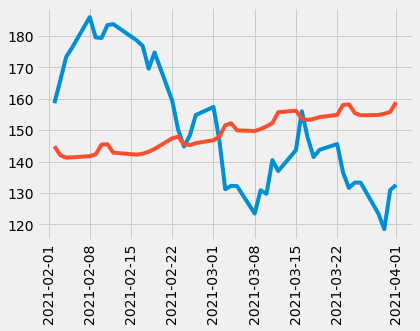

In [157]:
plt.plot(df_test['Date'],df_test['Close'])
plt.plot(df_test['Date'],df_test['predictions'])
plt.xticks(rotation=90)

## LSTM

In [158]:
from sklearn.preprocessing import MinMaxScaler


In [159]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("MRNA", start="2017-01-01")

In [160]:
df.head()

High    Low       Open      Close    Volume  Adj Close
Date                                                                   
2018-12-07  22.750000  18.51  22.000000  18.600000  12995600  18.600000
2018-12-10  19.438999  18.00  18.900000  18.799999   4233300  18.799999
2018-12-11  20.660000  17.99  20.549999  18.010000   3435300  18.010000
2018-12-12  19.480000  18.02  18.549999  18.680000   2590700  18.680000
2018-12-13  19.290001  18.68  19.250000  18.760000   1608600  18.760000

In [161]:
df.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2021-04-09  144.000000  133.339996  133.509995  140.919998   9907800   
2021-04-12  143.490005  136.360001  142.369995  139.399994   6060200   
2021-04-13  152.110001  145.350006  146.800003  149.710007  13729000   
2021-04-14  160.919998  152.490005  153.660004  160.029999  15252000   
2021-04-15  163.580002  155.229996  159.000000  159.869995  10239277   

             Adj Close  
Date                    
2021-04-09  140.919998  
2021-04-12  139.399994  
2021-04-13  149.710007  
2021-04-14  160.029999  
2021-04-15  159.869995

In [162]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(592, 1)


array([[22.        ],
       [18.89999962],
       [20.54999924],
       [18.54999924],
       [19.25      ]])

In [163]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [164]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.12883598],
       [0.08783068],
       [0.10965607],
       [0.08320104],
       [0.09246031]])

In [165]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.75171952],
       [0.7380952 ],
       [0.75238094],
       [0.74100527],
       [0.72063489]])

In [166]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [167]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.12883598, 0.08783068, 0.10965607, 0.08320104, 0.09246031,
        0.08584656, 0.080291  , 0.06402117, 0.06084657, 0.0494709 ,
        0.04153438, 0.02724867, 0.02499999, 0.01626984, 0.03253968,
        0.02619047, 0.03531746, 0.04272486, 0.0494709 , 0.06984128,
        0.06732804, 0.06534392, 0.05423281, 0.05740741, 0.06269841,
        0.06269841, 0.0600529 , 0.05013226, 0.05555554, 0.05767197,
        0.04404762, 0.03492063, 0.03359788, 0.03412698, 0.02910053,
        0.03253968, 0.03941798, 0.0600529 , 0.05238094, 0.05330689,
        0.06600529, 0.07526456, 0.06402117, 0.07579364, 0.07870369,
        0.08902116, 0.08439152, 0.10158731, 0.1223545 , 0.11719577]])

In [168]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.75171952, 0.7380952 , 0.75238094, 0.74100527, 0.72063489,
        0.73452381, 0.73068782, 0.72605821, 0.68862433, 0.73227516,
        0.7634921 , 0.73783069, 0.72592591, 0.67830688, 0.66904761,
        0.70621694, 0.69748674, 0.60171957, 0.57896823, 0.59234127,
        0.61150795, 0.63346562, 0.69797619, 0.73253967, 0.74391534,
        0.74100527, 0.74523807, 0.73068782, 0.73551584, 0.7042328 ,
        0.70935186, 0.75833328, 0.76984125, 0.79695769, 0.75806877,
        0.73597885, 0.75899469, 0.79021163, 0.78002649, 0.8100529 ,
        0.80899468, 0.81150794, 0.84219576, 0.89616404, 0.83624342,
        0.8439153 , 0.81626985, 0.79113756, 0.7845238 , 0.74396822]])

In [169]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [171]:
#Import all deep learing learning library to create LSTM model
#import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [172]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [173]:
model.add(Dense(units=1))

In [174]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [175]:
#Fit the model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 423 samples
Epoch 1/5
423/423 [==============================] - 22s 52ms/sample - loss: 0.0622
Epoch 2/5
423/423 [==============================] - 4s 9ms/sample - loss: 0.0146
Epoch 3/5
423/423 [==============================] - 5s 11ms/sample - loss: 0.0094
Epoch 4/5
423/423 [==============================] - 5s 12ms/sample - loss: 0.0069
Epoch 5/5
423/423 [==============================] - 5s 11ms/sample - loss: 0.0069


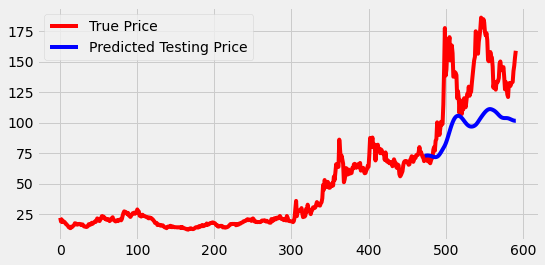

In [176]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

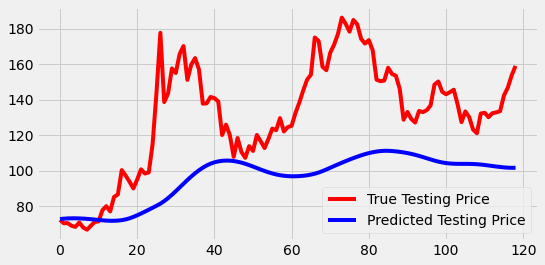

In [177]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [178]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[101.61855, 102.55919, 104.47648, 107.052704, 109.913666]


#  AstraZeneca PLC - AZN

In [179]:
myticker ='AZN'
df_AZN = web.DataReader([myticker], 'yahoo', start='2017-1-1')['Close']
df_AZN.columns = {'Close Price'}
df_AZN.head(10)

Close Price
Date                   
2017-01-03    27.709999
2017-01-04    27.930000
2017-01-05    28.690001
2017-01-06    28.430000
2017-01-09    28.530001
2017-01-10    28.750000
2017-01-11    28.180000
2017-01-12    28.240000
2017-01-13    28.580000
2017-01-17    28.469999

In [180]:
df_AZN.tail()

Close Price
Date                   
2021-04-09    49.939999
2021-04-12    49.419998
2021-04-13    49.189999
2021-04-14    49.840000
2021-04-15    50.830002

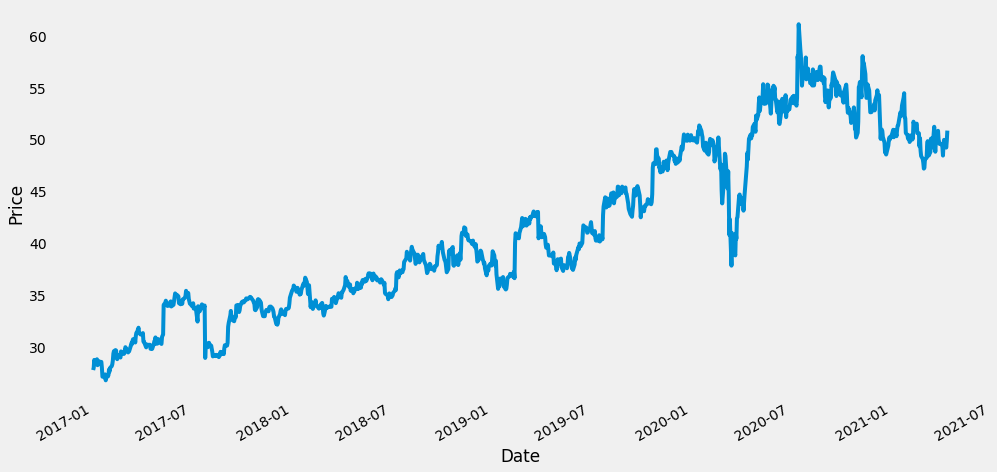

In [181]:
df_AZN['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

### Moving Average

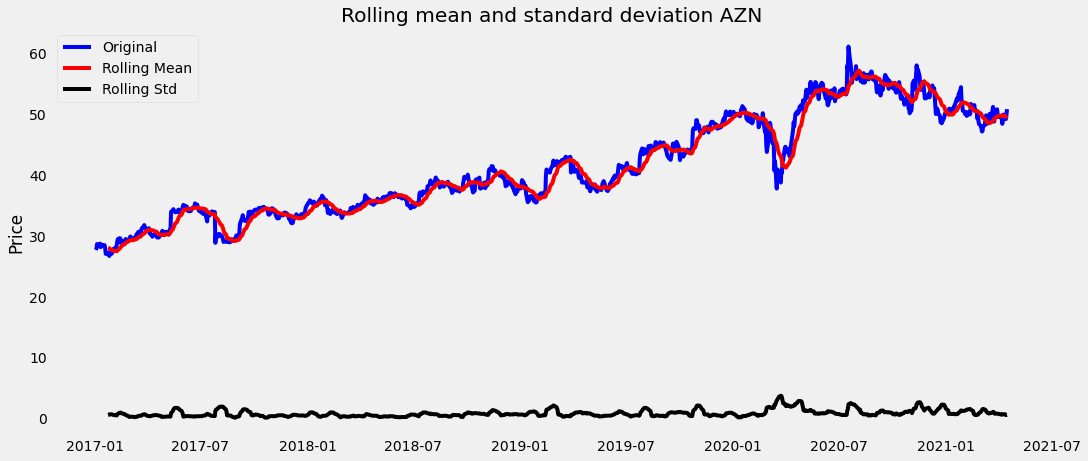

In [182]:
rolling_mean = df_AZN['Close Price'].rolling(15).mean()
rolling_std = df_AZN['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df_AZN['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [183]:
# create 20 days simple moving average column
df_AZN['SMA20'] = df_AZN['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df_AZN['SMA50'] = df_AZN['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df_AZN.head()

Close Price      SMA20      SMA50
Date                                         
2017-01-03    27.709999  27.709999  27.709999
2017-01-04    27.930000  27.820000  27.820000
2017-01-05    28.690001  28.110000  28.110000
2017-01-06    28.430000  28.190000  28.190000
2017-01-09    28.530001  28.258000  28.258000

In [184]:
df_AZN['Signal'] = 0.0
df_AZN['Signal'] = np.where(df_AZN['SMA20'] > df_AZN['SMA50'], 1.0, 0.0)

In [185]:
df_AZN['Position'] = df_AZN['Signal'].diff()
# display first few rows
df_AZN.head()

Close Price      SMA20      SMA50  Signal  Position
Date                                                           
2017-01-03    27.709999  27.709999  27.709999     0.0       NaN
2017-01-04    27.930000  27.820000  27.820000     0.0       0.0
2017-01-05    28.690001  28.110000  28.110000     0.0       0.0
2017-01-06    28.430000  28.190000  28.190000     0.0       0.0
2017-01-09    28.530001  28.258000  28.258000     0.0       0.0

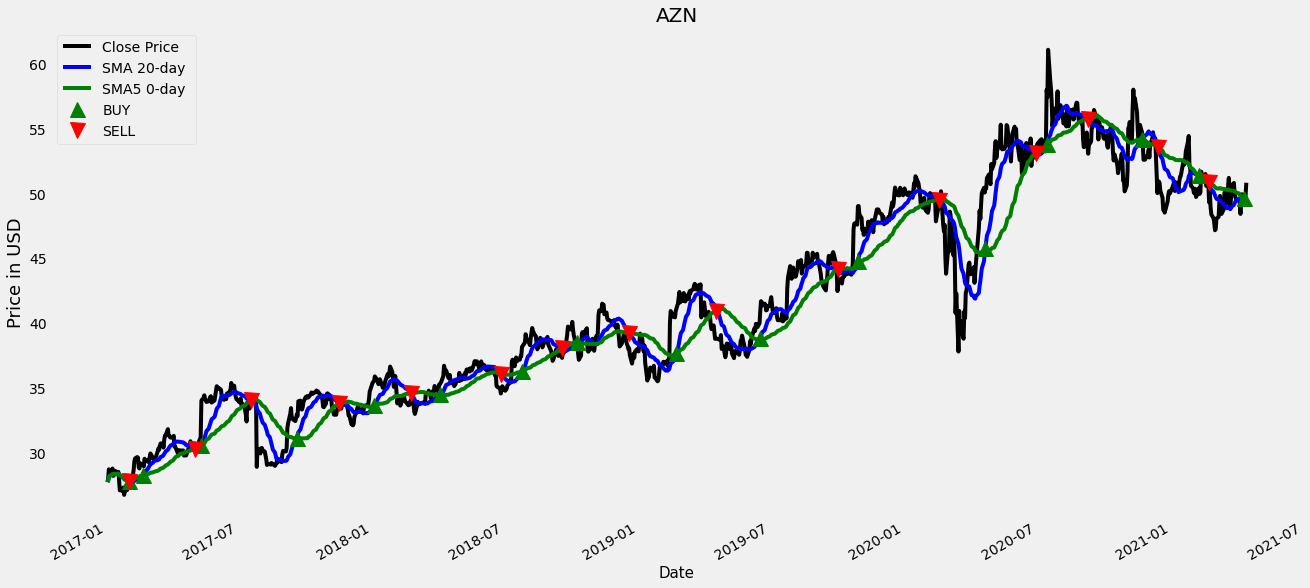

In [186]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_AZN['Close Price'].plot(color = 'k', label= 'Close Price') 
df_AZN['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df_AZN['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df_AZN[df_AZN['Position'] == 1].index, 
         df_AZN['SMA20'][df_AZN['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df_AZN[df_AZN['Position'] == -1].index, 
         df_AZN['SMA50'][df_AZN['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [187]:
df_position = df_AZN[(df_AZN['Position'] == 1) | (df_AZN['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2017-02-01 00:00:00 |         27.76 | 27.8255 | 27.82   |        1 | Buy        |
| 2017-02-02 00:00:00 |         27.56 | 27.807  | 27.8082 |        0 | Sell       |
| 2017-02-21 00:00:00 |         29.01 | 28.2205 | 28.1912 |        1 | Buy        |
| 2017-05-03 00:00:00 |         30.5  | 30.2395 | 30.2656 |        0 | Sell       |
| 2017-05-12 00:00:00 |         34    | 30.581  | 30.5268 |        1 | Buy        |
| 2017-07-19 00:00:00 |         33.6  | 33.978  | 34.01   |        0 | Sell       |
| 2017-09-20 00:00:00 |         32.93 | 31.136  | 31.059  |        1 | Buy        |
| 2017-11-17 00:00:00 |         33.46 | 33.7435 | 33.79   |        0 | Sell       |
| 2018-01-04 00:00:00 |         35.5  | 33.632  | 33.5702 |        1 | Buy  

### Exponential Smoothing

In [188]:
df_AZN['EMA20'] = df_AZN['Close Price'].ewm(span = 20, adjust = False).mean()

In [189]:
df_AZN['EMA50'] = df_AZN['Close Price'].ewm(span = 50, adjust = False).mean()

In [190]:
df_AZN['Signal'] = 0.0  
df_AZN['Signal'] = np.where(df_AZN['EMA20'] > df_AZN['EMA50'], 1.0, 0.0)

In [191]:
df_AZN['Position'] = df_AZN['Signal'].diff()

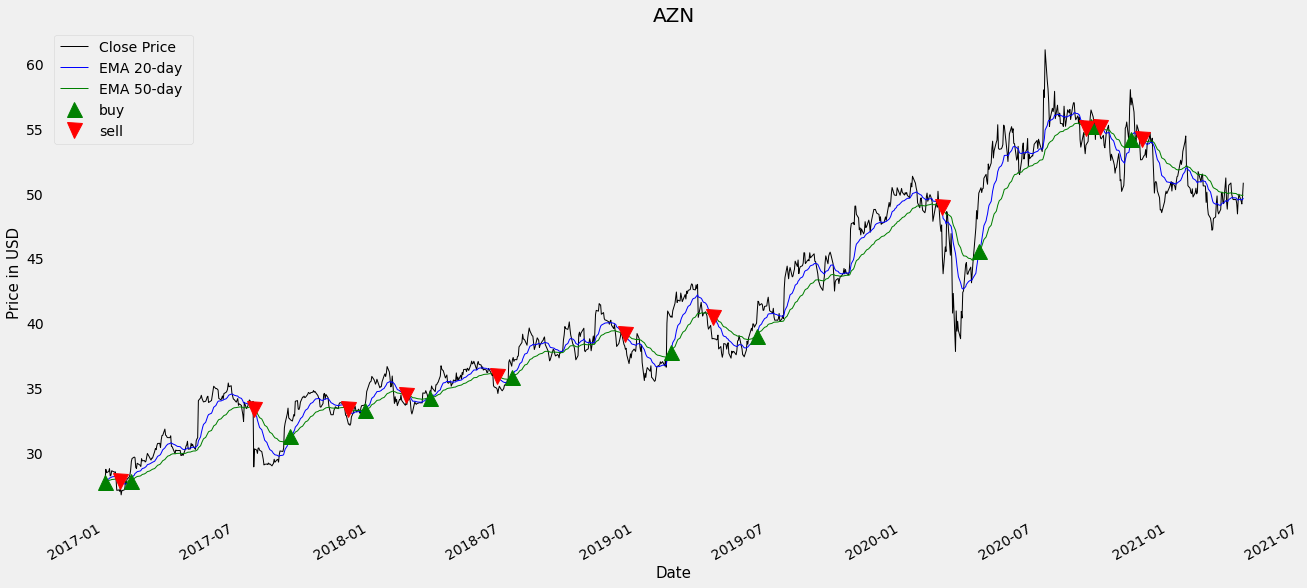

In [192]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_AZN['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df_AZN['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df_AZN['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df_AZN[df_AZN['Position'] == 1].index, 
         df_AZN['EMA20'][df_AZN['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df_AZN[df_AZN['Position'] == -1].index, 
         df_AZN['EMA50'][df_AZN['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [193]:
df_position = df_AZN[(df_AZN['Position'] == 1) | (df_AZN['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+---------+---------+
| Date                |   Close Price |   SMA20 |   SMA50 |   Signal | Position   |   EMA20 |   EMA50 |
|---------------------+---------------+---------+---------+----------+------------+---------+---------|
| 2017-01-04 00:00:00 |         27.93 | 27.82   | 27.82   |        1 | Buy        | 27.731  | 27.7186 |
| 2017-01-25 00:00:00 |         27.29 | 28.0231 | 28.0231 |        0 | Sell       | 27.8089 | 27.8246 |
| 2017-02-08 00:00:00 |         28.62 | 27.7315 | 27.8719 |        1 | Buy        | 27.7973 | 27.7818 |
| 2017-07-27 00:00:00 |         28.88 | 33.4285 | 34.064  |        0 | Sell       | 33.3358 | 33.3545 |
| 2017-09-15 00:00:00 |         32.53 | 30.5925 | 31.111  |        1 | Buy        | 31.2522 | 31.2516 |
| 2017-12-04 00:00:00 |         32.17 | 33.345  | 33.874  |        0 | Sell       | 33.3574 | 33.3681 |
| 2017-12-27 00:00:00 |         33.72 | 33.0455 | 33.5304 |     

## fbprophet

In [194]:
df = wb.DataReader('AZN', data_source='yahoo', start='2017-1-1')

In [195]:
df=df.reset_index()
df

Date       High        Low       Open      Close      Volume  \
0    2017-01-03  27.740000  27.450001  27.530001  27.709999   5130800.0   
1    2017-01-04  28.000000  27.709999  27.709999  27.930000   4562500.0   
2    2017-01-05  28.760000  28.250000  28.320000  28.690001   5583000.0   
3    2017-01-06  28.549999  28.330000  28.410000  28.430000   6055500.0   
4    2017-01-09  28.580000  28.270000  28.330000  28.530001   4158600.0   
...         ...        ...        ...        ...        ...         ...   
1073 2021-04-09  50.160000  49.680000  50.150002  49.939999   7432200.0   
1074 2021-04-12  49.919998  49.369999  49.830002  49.419998   7890500.0   
1075 2021-04-13  49.599998  48.959999  49.209999  49.189999   7733900.0   
1076 2021-04-14  50.320000  49.740002  50.040001  49.840000  11863200.0   
1077 2021-04-15  51.285000  50.610001  50.740002  50.830002  13862764.0   

      Adj Close  
0     23.433638  
1     23.619688  
2     24.262403  
3     24.042524  
4     24.127094  
...         ...  
1073  49.939999  
1074  49.419998  
1075  49.189999  
1076  49.840000  
1077  50.830002  

[1078 rows x 7 columns]

In [196]:
a='2021-02-01'

In [197]:
df_train=df[df['Date'] < a]
df_train.tail()

Date       High        Low       Open      Close      Volume  \
1021 2021-01-25  54.209999  53.590000  53.730000  54.009998  13742800.0   
1022 2021-01-26  54.650002  54.189999  54.520000  54.439999  11614400.0   
1023 2021-01-27  53.430000  52.029999  53.369999  52.099998  14550200.0   
1024 2021-01-28  52.939999  51.990002  52.119999  52.040001   8374800.0   
1025 2021-01-29  52.209999  50.509998  51.730000  50.599998  12686300.0   

      Adj Close  
1021  52.985855  
1022  53.407703  
1023  51.112072  
1024  51.053215  
1025  49.640518

In [198]:
start_date='2021-02-01'
end_date='2021-04-01'

In [199]:
df_test =df[(df['Date'] > start_date) & (df['Date'] <= end_date)]
df_test

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  50.630001  50.020000  50.520000  50.060001  11349800.0   
1028 2021-02-03  50.340000  49.730000  50.160000  50.000000   9069700.0   
1029 2021-02-04  50.450001  50.040001  50.310001  50.360001   7317700.0   
1030 2021-02-05  50.099998  49.650002  49.950001  49.730000   9803800.0   
1031 2021-02-08  50.529999  49.799999  50.099998  50.060001   8559100.0   
1032 2021-02-09  50.639999  50.040001  50.160000  50.410000   8058100.0   
1033 2021-02-10  50.840000  49.759998  50.779999  49.970001   9656600.0   
1034 2021-02-11  50.430000  49.599998  50.340000  50.090000  13265000.0   
1035 2021-02-12  51.740002  50.799999  50.930000  51.689999  11854800.0   
1036 2021-02-16  51.259998  50.599998  51.020000  50.889999   8823300.0   
1037 2021-02-17  51.790001  50.849998  51.049999  51.450001   9514000.0   
1038 2021-02-18  51.980000  51.410000  51.490002  51.500000   9762100.0   
1039 2021-02-19  51.160000  50.549999  51.130001  50.590000   6895600.0   
1040 2021-02-22  50.810001  50.360001  50.669998  50.570000  10776000.0   
1041 2021-02-23  50.770000  49.220001  50.700001  49.310001  14535900.0   
1042 2021-02-24  50.320000  49.509998  49.660000  50.099998  12218600.0   
1043 2021-02-25  49.869999  48.750000  49.849998  48.910000  12795900.0   
1044 2021-02-26  48.919998  47.980000  48.849998  48.380001   8547800.0   
1045 2021-03-01  48.680000  48.080002  48.459999  48.090000  11374500.0   
1046 2021-03-02  48.430000  47.669998  48.400002  47.730000  14356500.0   
1047 2021-03-03  47.639999  46.849998  47.639999  47.160000  14030700.0   
1048 2021-03-04  47.950001  46.480000  47.590000  47.230000  15966800.0   
1049 2021-03-05  48.119999  47.150002  47.570000  48.060001  11174100.0   
1050 2021-03-08  48.470001  47.660000  47.750000  48.189999  11751100.0   
1051 2021-03-09  49.880001  49.070000  49.400002  49.270000  15538500.0   
1052 2021-03-10  50.290001  49.700001  50.200001  49.810001  12727600.0   
1053 2021-03-11  49.270000  48.590000  48.950001  48.669998  12642000.0   
1054 2021-03-12  48.580002  47.880001  48.270000  48.419998   8912800.0   
1055 2021-03-15  48.779999  48.130001  48.580002  48.770000  10645400.0   
1056 2021-03-16  50.470001  49.860001  49.950001  50.049999  16766200.0   
1057 2021-03-17  50.119999  49.090000  49.799999  50.070000  12993500.0   
1058 2021-03-18  49.970001  49.279999  49.470001  49.330002   9790700.0   
1059 2021-03-19  49.480000  48.889999  49.220001  49.209999   6783200.0   
1060 2021-03-22  51.209999  49.869999  49.980000  51.200001  10092000.0   
1061 2021-03-23  50.209999  49.160000  49.950001  49.400002  10891800.0   
1062 2021-03-24  49.299999  48.759998  49.130001  48.790001   6482600.0   
1063 2021-03-25  49.790001  48.810001  48.930000  49.700001   6800200.0   
1064 2021-03-26  50.669998  49.480000  49.560001  50.639999   9705800.0   
1065 2021-03-29  51.060001  50.480000  50.549999  50.810001   8652400.0   
1066 2021-03-30  50.169998  49.689999  50.139999  49.970001   7084800.0   
1067 2021-03-31  50.130001  49.700001  50.040001  49.720001   6688300.0   
1068 2021-04-01  49.790001  49.330002  49.610001  49.529999   5958200.0   

      Adj Close  
1027  49.110760  
1028  49.051895  
1029  49.405071  
1030  48.787014  
1031  49.110760  
1032  49.454121  
1033  49.022465  
1034  49.140190  
1035  50.709850  
1036  49.925018  
1037  50.474400  
1038  50.523453  
1039  49.630707  
1040  49.611088  
1041  48.374981  
1042  49.149998  
1043  48.910000  
1044  48.380001  
1045  48.090000  
1046  47.730000  
1047  47.160000  
1048  47.230000  
1049  48.060001  
1050  48.189999  
1051  49.270000  
1052  49.810001  
1053  48.669998  
1054  48.419998  
1055  48.770000  
1056  50.049999  
1057  50.070000  
1058  49.330002  
1059  49.209999  
1060  51.200001  
1061  49.400002  
1062  48.790001  
1063  49.700001  
1064  50.639999  
1065  50.810001  
1066  49.970001  
1067  49.720001  
1068  49.529999

In [200]:
df.describe()

High          Low         Open        Close        Volume  \
count  1078.000000  1078.000000  1078.000000  1078.000000  1.078000e+03   
mean     41.661201    41.042987    41.359369    41.350547  5.077276e+06   
std       8.325073     8.103720     8.249518     8.189944  4.028453e+06   
min      27.080000    26.510000    26.520000    26.719999  7.558000e+05   
25%      34.874999    34.490002    34.660000    34.650002  2.901850e+06   
50%      39.469999    38.889999    39.245001    39.225000  4.016950e+06   
75%      49.589999    48.889999    49.257501    49.217501  5.804975e+06   
max      64.940002    57.840000    62.689999    61.099998  5.634660e+07   

         Adj Close  
count  1078.000000  
mean     38.800500  
std       9.187145  
min      22.596422  
25%      30.865735  
50%      36.545401  
75%      47.583736  
max      59.466022

In [201]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
#df_train=df_train.reset_index()
df_train[['ds','y']]= df_train[['Date','Close']]
df_train

Date       High        Low       Open      Close      Volume  \
0    2017-01-03  27.740000  27.450001  27.530001  27.709999   5130800.0   
1    2017-01-04  28.000000  27.709999  27.709999  27.930000   4562500.0   
2    2017-01-05  28.760000  28.250000  28.320000  28.690001   5583000.0   
3    2017-01-06  28.549999  28.330000  28.410000  28.430000   6055500.0   
4    2017-01-09  28.580000  28.270000  28.330000  28.530001   4158600.0   
...         ...        ...        ...        ...        ...         ...   
1021 2021-01-25  54.209999  53.590000  53.730000  54.009998  13742800.0   
1022 2021-01-26  54.650002  54.189999  54.520000  54.439999  11614400.0   
1023 2021-01-27  53.430000  52.029999  53.369999  52.099998  14550200.0   
1024 2021-01-28  52.939999  51.990002  52.119999  52.040001   8374800.0   
1025 2021-01-29  52.209999  50.509998  51.730000  50.599998  12686300.0   

      Adj Close         ds          y  
0     23.433638 2017-01-03  27.709999  
1     23.619688 2017-01-04  27.930000  
2     24.262403 2017-01-05  28.690001  
3     24.042524 2017-01-06  28.430000  
4     24.127094 2017-01-09  28.530001  
...         ...        ...        ...  
1021  52.985855 2021-01-25  54.009998  
1022  53.407703 2021-01-26  54.439999  
1023  51.112072 2021-01-27  52.099998  
1024  51.053215 2021-01-28  52.040001  
1025  49.640518 2021-01-29  50.599998  

[1026 rows x 9 columns]

In [202]:
model=Prophet()

In [203]:
# drop the columans
prophet_df=df_train.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [204]:
prophet_df.reset_index(drop=True,inplace=True)

In [205]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
future=model.make_future_dataframe(periods=62)

In [207]:
future.tail()

ds
1083 2021-03-28
1084 2021-03-29
1085 2021-03-30
1086 2021-03-31
1087 2021-04-01

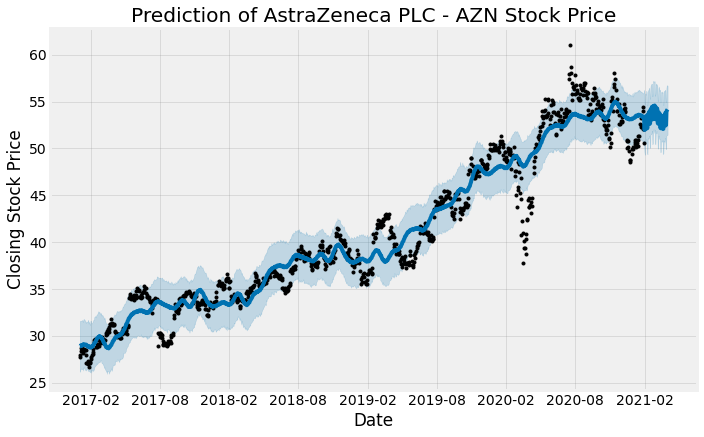

ds       yhat  yhat_lower  yhat_upper
1083 2021-03-28  52.529520   49.989330   55.119086
1084 2021-03-29  53.896413   51.363929   56.494993
1085 2021-03-30  54.048855   51.406238   56.759988
1086 2021-03-31  54.116683   51.445546   56.701895
1087 2021-04-01  54.174202   51.465231   56.707257

In [208]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of AstraZeneca PLC - AZN Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

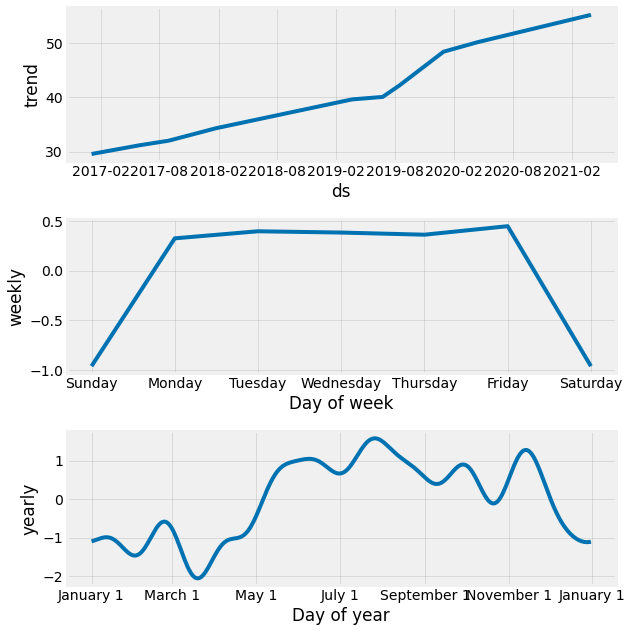

In [209]:
model.plot_components(predictions)
plt.show()

In [210]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2017-01-03  28.873086   26.196856   31.337456
1 2017-01-04  28.883863   26.205152   31.262551
2 2017-01-05  28.886452   26.319459   31.527101
3 2017-01-06  28.996089   26.360400   31.470370
4 2017-01-09  28.939801   26.456342   31.449566

In [211]:
df_test.head()

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  50.630001  50.020000  50.520000  50.060001  11349800.0   
1028 2021-02-03  50.340000  49.730000  50.160000  50.000000   9069700.0   
1029 2021-02-04  50.450001  50.040001  50.310001  50.360001   7317700.0   
1030 2021-02-05  50.099998  49.650002  49.950001  49.730000   9803800.0   
1031 2021-02-08  50.529999  49.799999  50.099998  50.060001   8559100.0   

      Adj Close  
1027  49.110760  
1028  49.051895  
1029  49.405071  
1030  48.787014  
1031  49.110760

In [212]:
df_test['predictions']=predictions['yhat']

In [213]:
df_test.head()

Date       High        Low       Open      Close      Volume  \
1027 2021-02-02  50.630001  50.020000  50.520000  50.060001  11349800.0   
1028 2021-02-03  50.340000  49.730000  50.160000  50.000000   9069700.0   
1029 2021-02-04  50.450001  50.040001  50.310001  50.360001   7317700.0   
1030 2021-02-05  50.099998  49.650002  49.950001  49.730000   9803800.0   
1031 2021-02-08  50.529999  49.799999  50.099998  50.060001   8559100.0   

      Adj Close  predictions  
1027  49.110760    51.985005  
1028  49.051895    53.278405  
1029  49.405071    53.363661  
1030  48.787014    53.372317  
1031  49.110760    53.380127

(array([737822., 737829., 737836., 737843., 737850., 737857., 737864.,
        737871., 737881.]), <a list of 9 Text major ticklabel objects>)

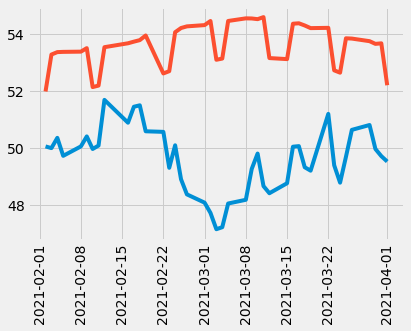

In [214]:
plt.plot(df_test['Date'],df_test['Close'])
plt.plot(df_test['Date'],df_test['predictions'])
plt.xticks(rotation=90)

# LSTM

In [215]:
from sklearn.preprocessing import MinMaxScaler


In [216]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("AZN", start="2017-01-01")

In [217]:
df.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2017-01-03  27.740000  27.450001  27.530001  27.709999  5130800.0  23.433638
2017-01-04  28.000000  27.709999  27.709999  27.930000  4562500.0  23.619688
2017-01-05  28.760000  28.250000  28.320000  28.690001  5583000.0  24.262403
2017-01-06  28.549999  28.330000  28.410000  28.430000  6055500.0  24.042524
2017-01-09  28.580000  28.270000  28.330000  28.530001  4158600.0  24.127094

In [218]:
df.tail()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-04-09  50.160000  49.680000  50.150002  49.939999   7432200.0  49.939999
2021-04-12  49.919998  49.369999  49.830002  49.419998   7890500.0  49.419998
2021-04-13  49.599998  48.959999  49.209999  49.189999   7733900.0  49.189999
2021-04-14  50.320000  49.740002  50.040001  49.840000  11863200.0  49.840000
2021-04-15  51.285000  50.610001  50.740002  50.830002  13862764.0  50.830002

In [219]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1078, 1)


array([[27.53000069],
       [27.70999908],
       [28.31999969],
       [28.40999985],
       [28.32999992]])

In [220]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [221]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.03319094],
       [0.0391061 ],
       [0.05915213],
       [0.06210974],
       [0.05948076]])

In [222]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.45612885],
       [0.46861644],
       [0.53499831],
       [0.57476167],
       [0.56621753]])

In [223]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [224]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.03319094, 0.0391061 , 0.05915213, 0.06210974, 0.05948076,
        0.07229704, 0.06408146, 0.0525797 , 0.06046665, 0.07131121,
        0.06999669, 0.05619451, 0.02859017, 0.01906014, 0.01347354,
        0.02333221, 0.0345054 , 0.01380217, 0.01708841, 0.        ,
        0.02333221, 0.01610252, 0.03384814, 0.0391061 , 0.05488005,
        0.05422279, 0.06901086, 0.08938545, 0.1012159 , 0.09365759,
        0.06671044, 0.0729543 , 0.08675647, 0.08084124, 0.06901086,
        0.08938545, 0.08905682, 0.08544201, 0.09628657, 0.08182714,
        0.09530068, 0.10253036, 0.1068025 , 0.08445612, 0.09760103,
        0.09201443, 0.09760103, 0.09957275, 0.11403218, 0.11731842]])

In [225]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.45612885, 0.46861644, 0.53499831, 0.57476167, 0.56621753,
        0.5557016 , 0.56687479, 0.57509037, 0.55734469, 0.55504434,
        0.57147549, 0.62076895, 0.69405188, 0.69503771, 0.72395657,
        0.77817943, 0.76569172, 0.77456456, 0.7926388 , 0.78113704,
        0.79461058, 0.82451528, 0.84784749, 0.83798882, 0.90207034,
        0.83831739, 0.8445613 , 0.85803485, 0.90502795, 0.88629645,
        0.87348004, 0.87117969, 0.91718697, 0.93000325, 0.9027276 ,
        0.85639176, 0.89122572, 0.88301014, 0.91390079, 1.        ,
        0.92638838, 0.92014458, 0.83568847, 0.89056846, 0.94511988,
        0.9135721 , 0.91915876, 0.92113041, 0.92244494, 0.91422936]])

In [226]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [227]:
#Import all deep learing learning library to create LSTM model
#import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [228]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [229]:
model.add(Dense(units=1))

In [230]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [231]:
#Fit the model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 812 samples
Epoch 1/5
812/812 [==============================] - 26s 31ms/sample - loss: 0.0442
Epoch 2/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0096
Epoch 3/5
812/812 [==============================] - 9s 12ms/sample - loss: 0.0050
Epoch 4/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0052
Epoch 5/5
812/812 [==============================] - 9s 11ms/sample - loss: 0.0049


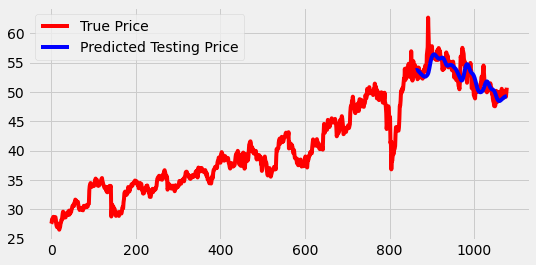

In [232]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

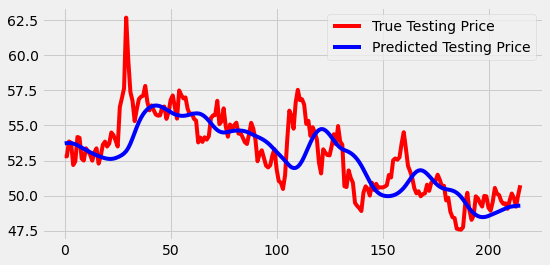

In [233]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [234]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[49.28609, 51.38022, 56.335804, 63.529404, 71.74488]


# BioNTech SE - BNTX

In [235]:
myticker ='BNTX'
df_BNTX = web.DataReader([myticker], 'yahoo', start='2017-1-1')['Close']
df_BNTX.columns = {'Close Price'}
df_BNTX.head(10)

Close Price
Date                   
2019-10-10    14.240000
2019-10-11    13.820000
2019-10-14    12.750000
2019-10-15    12.920000
2019-10-16    12.940000
2019-10-17    13.000000
2019-10-18    14.140000
2019-10-21    16.280001
2019-10-22    20.639999
2019-10-23    17.639999

In [236]:
df_BNTX.tail()

Close Price
Date                   
2021-04-09   122.139999
2021-04-12   121.519997
2021-04-13   129.639999
2021-04-14   132.600006
2021-04-15   140.720001

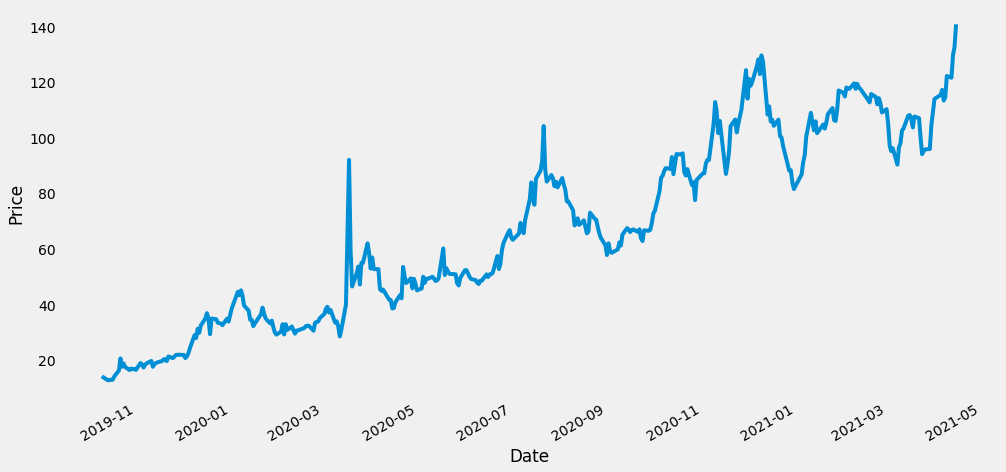

In [237]:
df_BNTX['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

### Moving Average

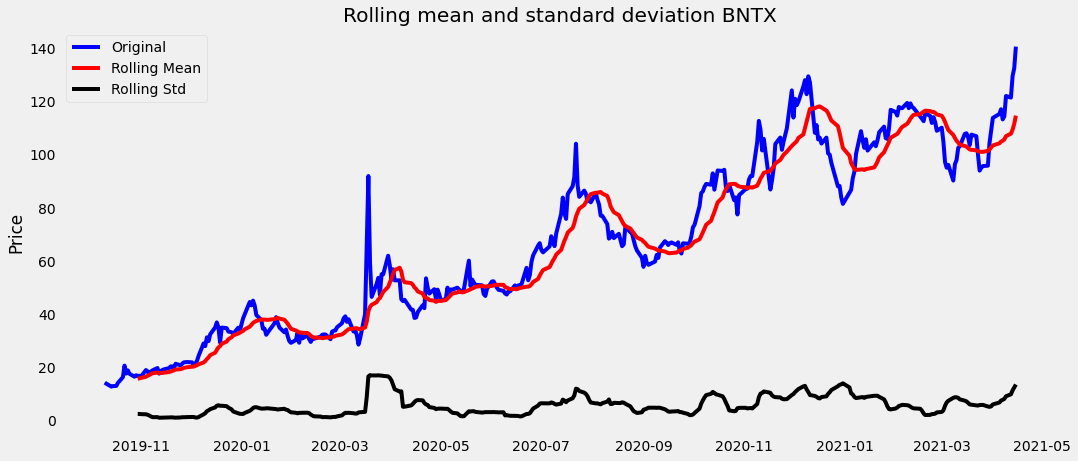

In [238]:
rolling_mean = df_BNTX['Close Price'].rolling(15).mean()
rolling_std = df_BNTX['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df_BNTX['Close Price'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [239]:
# create 20 days simple moving average column
df_BNTX['SMA20'] = df_BNTX['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df_BNTX['SMA50'] = df_BNTX['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df_BNTX.head()

Close Price      SMA20      SMA50
Date                                         
2019-10-10        14.24  14.240000  14.240000
2019-10-11        13.82  14.030000  14.030000
2019-10-14        12.75  13.603333  13.603333
2019-10-15        12.92  13.432500  13.432500
2019-10-16        12.94  13.334000  13.334000

In [240]:
df_BNTX['Signal'] = 0.0
df_BNTX['Signal'] = np.where(df_BNTX['SMA20'] > df_BNTX['SMA50'], 1.0, 0.0)

In [241]:
df_BNTX['Position'] = df_BNTX['Signal'].diff()
# display first few rows
df_BNTX.head()

Close Price      SMA20      SMA50  Signal  Position
Date                                                           
2019-10-10        14.24  14.240000  14.240000     0.0       NaN
2019-10-11        13.82  14.030000  14.030000     0.0       0.0
2019-10-14        12.75  13.603333  13.603333     0.0       0.0
2019-10-15        12.92  13.432500  13.432500     0.0       0.0
2019-10-16        12.94  13.334000  13.334000     0.0       0.0

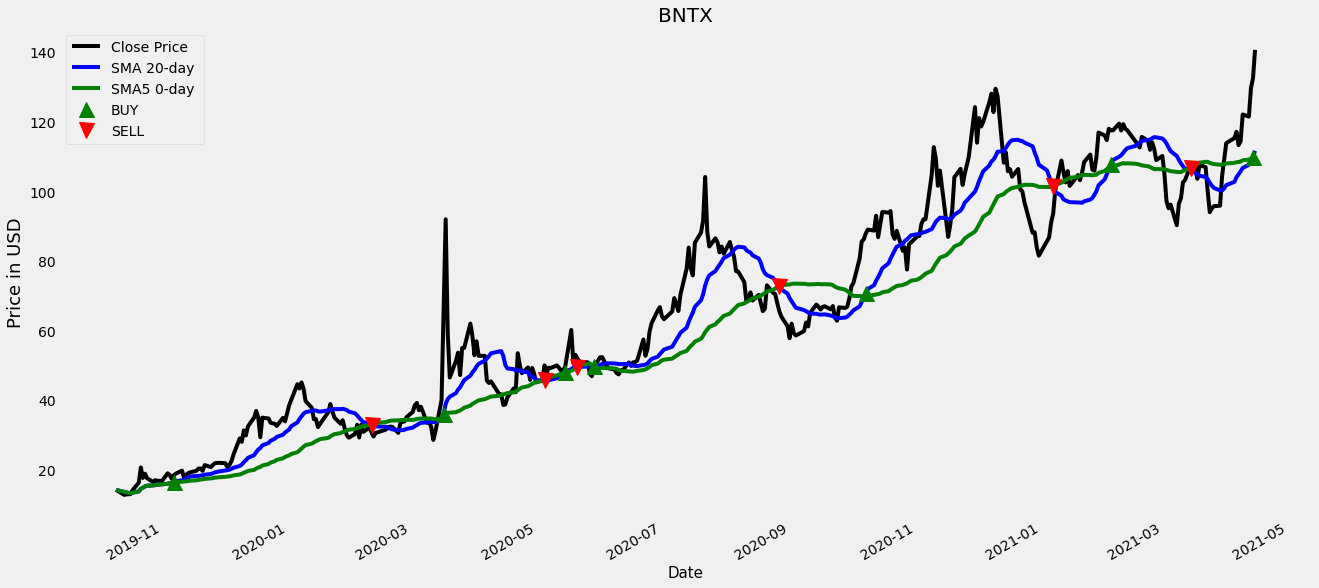

In [242]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_BNTX['Close Price'].plot(color = 'k', label= 'Close Price') 
df_BNTX['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df_BNTX['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df_BNTX[df_BNTX['Position'] == 1].index, 
         df_BNTX['SMA20'][df_BNTX['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df_BNTX[df_BNTX['Position'] == -1].index, 
         df_BNTX['SMA50'][df_BNTX['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [243]:
df_position = df_BNTX[(df_BNTX['Position'] == 1) | (df_BNTX['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |    SMA20 |    SMA50 |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2019-11-07 00:00:00 |         18.42 |  16.3695 |  16.2681 |        1 | Buy        |
| 2020-02-11 00:00:00 |         30.71 |  32.9515 |  32.9762 |        0 | Sell       |
| 2020-03-17 00:00:00 |         66.6  |  35.946  |  35.0848 |        1 | Buy        |
| 2020-05-05 00:00:00 |         50    |  45.3605 |  45.8842 |        0 | Sell       |
| 2020-05-15 00:00:00 |         49.49 |  48.101  |  47.9788 |        1 | Buy        |
| 2020-05-21 00:00:00 |         51.9  |  49.4295 |  49.5388 |        0 | Sell       |
| 2020-05-29 00:00:00 |         49.53 |  49.739  |  49.2952 |        1 | Buy        |
| 2020-08-27 00:00:00 |         65.59 |  72.757  |  72.7708 |        0 | Sell       |
| 2020-10-08 00:00:00 |         87.95 |  70.767  |  70

### Exponential Smoothing

In [244]:
df_BNTX['EMA20'] = df_BNTX['Close Price'].ewm(span = 20, adjust = False).mean()

In [245]:
df_BNTX['EMA50'] = df_BNTX['Close Price'].ewm(span = 50, adjust = False).mean()

In [246]:
df_BNTX['Signal'] = 0.0  
df_BNTX['Signal'] = np.where(df_BNTX['EMA20'] > df_BNTX['EMA50'], 1.0, 0.0)

In [247]:
df_BNTX['Position'] = df_BNTX['Signal'].diff()

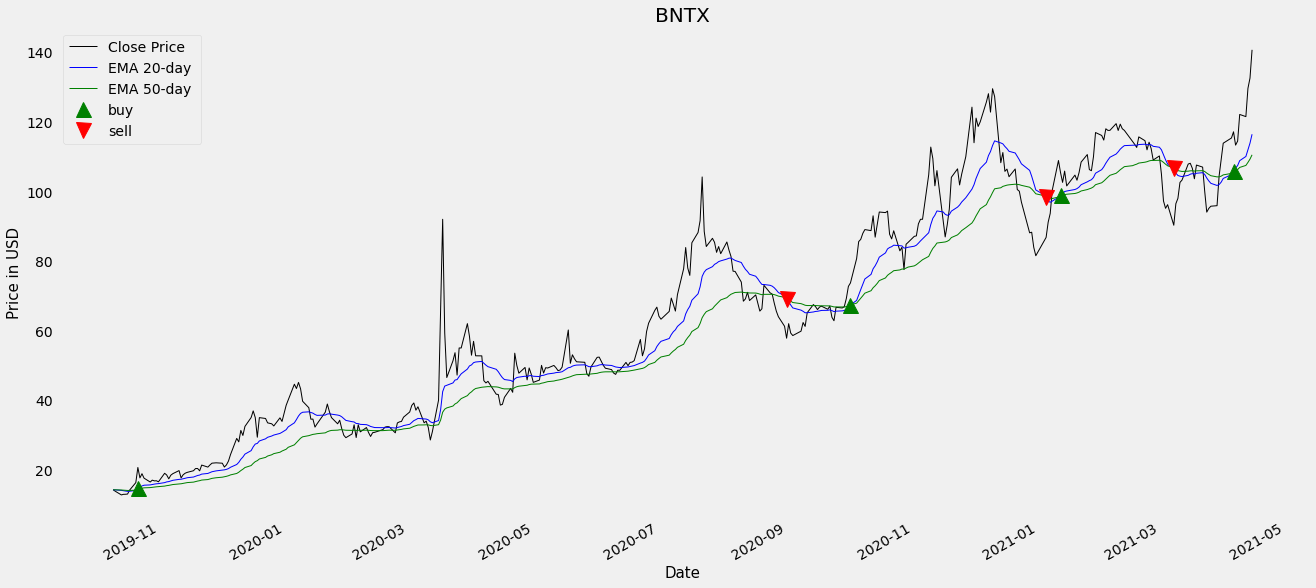

In [248]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_BNTX['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
df_BNTX['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df_BNTX['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df_BNTX[df_BNTX['Position'] == 1].index, 
         df_BNTX['EMA20'][df_BNTX['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df_BNTX[df_BNTX['Position'] == -1].index, 
         df_BNTX['EMA50'][df_BNTX['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title(myticker , fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [249]:
df_position = df_BNTX[(df_BNTX['Position'] == 1) | (df_BNTX['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+----------+----------+----------+------------+----------+----------+
| Date                |   Close Price |    SMA20 |    SMA50 |   Signal | Position   |    EMA20 |    EMA50 |
|---------------------+---------------+----------+----------+----------+------------+----------+----------|
| 2019-10-22 00:00:00 |         20.64 |  14.5256 |  14.5256 |        1 | Buy        |  14.6732 |  14.3769 |
| 2020-09-01 00:00:00 |         57.81 |  69.3725 |  73.237  |        0 | Sell       |  68.8551 |  69.1093 |
| 2020-10-02 00:00:00 |         73.7  |  65.8395 |  69.98   |        1 | Buy        |  67.4019 |  67.3713 |
| 2021-01-05 00:00:00 |         86.78 | 104.389  | 101.279  |        0 | Sell       |  97.8651 |  98.3242 |
| 2021-01-12 00:00:00 |        105.45 |  97.6955 | 102.912  |        1 | Buy        |  99.0128 |  98.6763 |
| 2021-03-08 00:00:00 |         90.29 | 110.221  | 105.621  |        0 | Sell       | 106.203  | 106.713  |
| 2021-04-06 00:00:00 |     

### fbprophet

In [250]:
df = wb.DataReader('BNTX', data_source='yahoo', start='2017-1-1')

In [251]:
df=df.reset_index()
df

Date        High         Low        Open       Close   Volume  \
0   2019-10-10   16.698999   13.010000   16.500000   14.240000  2805800   
1   2019-10-11   15.340000   13.500000   15.340000   13.820000  1364300   
2   2019-10-14   13.910000   12.525000   13.830000   12.750000   899100   
3   2019-10-15   13.000000   12.530000   12.990000   12.920000   484700   
4   2019-10-16   13.880000   12.610000   13.200000   12.940000   524200   
..         ...         ...         ...         ...         ...      ...   
376 2021-04-09  123.500000  114.720001  114.949997  122.139999  4186600   
377 2021-04-12  122.250000  118.290001  120.550003  121.519997  1620200   
378 2021-04-13  130.809998  124.769997  125.000000  129.639999  4187500   
379 2021-04-14  132.600006  129.210007  130.800003  132.600006  3344400   
380 2021-04-15  140.789993  128.160004  130.000000  140.720001  3693148   

      Adj Close  
0     14.240000  
1     13.820000  
2     12.750000  
3     12.920000  
4     12.940000  
..          ...  
376  122.139999  
377  121.519997  
378  129.639999  
379  132.600006  
380  140.720001  

[381 rows x 7 columns]

In [252]:
a='2021-02-01'

In [253]:
df_train=df[df['Date'] < a]

In [254]:
df_train.tail()

Date        High         Low        Open       Close   Volume  \
324 2021-01-25  110.980003  105.139999  108.000000  110.610001  2882600   
325 2021-01-26  112.832001  105.489998  110.279999  106.290001  3863900   
326 2021-01-27  110.863998  103.019997  105.150002  105.970001  2139600   
327 2021-01-28  111.239998  106.599998  107.662003  110.000000  2296600   
328 2021-01-29  118.169998  111.400002  114.940002  116.940002  6622800   

      Adj Close  
324  110.610001  
325  106.290001  
326  105.970001  
327  110.000000  
328  116.940002

In [255]:
start_date='2021-02-01'
end_date='2021-04-01'

In [256]:
df_test =df[(df['Date'] > start_date) & (df['Date'] <= end_date)]

In [257]:
df_test

Date        High         Low        Open       Close   Volume  \
330 2021-02-02  115.879997  110.559998  115.000000  114.760002  1906700   
331 2021-02-03  119.250000  113.709999  114.209999  118.019997  2426900   
332 2021-02-04  120.088997  116.989998  117.900002  117.559998  1441700   
333 2021-02-05  119.209999  116.559998  117.430000  117.570000   875000   
334 2021-02-08  120.989998  117.599998  117.610001  119.500000  1922900   
335 2021-02-09  119.980003  117.120003  119.970001  117.529999  1099200   
336 2021-02-10  120.330002  117.099998  119.055000  119.349998  1397500   
337 2021-02-11  119.930000  115.419998  119.000000  118.029999  1350900   
338 2021-02-12  118.800003  115.849998  118.489998  117.559998  1027800   
339 2021-02-16  117.820000  112.550003  117.000000  114.379997  1517500   
340 2021-02-17  113.989998  108.120003  113.110001  113.559998  1331900   
341 2021-02-18  113.610001  107.360001  108.000000  112.650002  1604800   
342 2021-02-19  116.879997  113.019997  113.099998  115.690002  1381500   
343 2021-02-22  119.800003  114.029999  117.449997  114.599998  1578000   
344 2021-02-23  112.226997  106.199997  110.779999  111.970001  2088700   
345 2021-02-24  114.580002  109.230003  110.510002  114.169998  1405100   
346 2021-02-25  117.349998  111.180000  114.870003  112.330002  1129800   
347 2021-02-26  114.980003  109.029999  113.900002  109.029999  1028600   
348 2021-03-01  111.449997  108.059998  110.000000  110.209999   885200   
349 2021-03-02  109.860001  104.239998  109.860001  104.980003  1090800   
350 2021-03-03  105.000000   97.250000  104.830002   97.250000  2139800   
351 2021-03-04  100.905998   92.510002   97.400002   95.150002  2330500   
352 2021-03-05   96.839996   91.220001   95.680000   96.199997  1692200   
353 2021-03-08   95.699997   90.290001   94.830002   90.290001  1515600   
354 2021-03-09   97.930000   93.570000   94.110001   96.480003  1314900   
355 2021-03-10  101.989998   97.080002  100.787003   98.019997  1376100   
356 2021-03-11  103.000000  100.239998  100.500000  102.599998  1059200   
357 2021-03-12  103.279999   99.010002   99.339996  103.279999   785500   
358 2021-03-15  108.150002  102.042000  103.989998  107.879997  1365500   
359 2021-03-16  110.980003  104.699997  109.258003  108.099998  1374800   
360 2021-03-17  107.800003  102.800003  105.739998  106.660004   918800   
361 2021-03-18  104.910004  103.029999  104.389999  103.650002   700800   
362 2021-03-19  107.800003  102.820000  104.500000  107.589996  1145200   
363 2021-03-22  108.699997  106.320000  106.629997  107.000000   631800   
364 2021-03-23  107.349998  100.110001  107.330002  100.110001  1210400   
365 2021-03-24  101.480003   93.389999  100.239998   94.050003  2204100   
366 2021-03-25   97.449997   92.931000   94.099998   95.129997  1299400   
367 2021-03-26   97.540001   93.820000   97.500000   95.760002   908300   
368 2021-03-29   98.870003   93.760002   97.540001   95.910004  1066200   
369 2021-03-30  106.475998   98.599998   99.800003  104.440002  3464000   
370 2021-03-31  111.000000  107.099998  109.467003  109.190002  2178900   
371 2021-04-01  114.080002  110.500000  110.510002  113.870003  2020700   

      Adj Close  
330  114.760002  
331  118.019997  
332  117.559998  
333  117.570000  
334  119.500000  
335  117.529999  
336  119.349998  
337  118.029999  
338  117.559998  
339  114.379997  
340  113.559998  
341  112.650002  
342  115.690002  
343  114.599998  
344  111.970001  
345  114.169998  
346  112.330002  
347  109.029999  
348  110.209999  
349  104.980003  
350   97.250000  
351   95.150002  
352   96.199997  
353   90.290001  
354   96.480003  
355   98.019997  
356  102.599998  
357  103.279999  
358  107.879997  
359  108.099998  
360  106.660004  
361  103.650002  
362  107.589996  
363  107.000000  
364  100.110001  
365   94.050003  
366   95.129997  
367   95.760002  
368   95.910004  
369  104.440002  
370  109.190002  
371  113.870003

In [258]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
#df_train=df_train.reset_index()
df_train[['ds','y']]= df_train[['Date','Close']]

In [259]:
model=Prophet(yearly_seasonality=True,daily_seasonality=True)

In [260]:
# drop the columans
prophet_df=df_train.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [261]:
prophet_df.reset_index(drop=True,inplace=True)

In [262]:
prophet_df

ds           y
0   2019-10-10   14.240000
1   2019-10-11   13.820000
2   2019-10-14   12.750000
3   2019-10-15   12.920000
4   2019-10-16   12.940000
..         ...         ...
324 2021-01-25  110.610001
325 2021-01-26  106.290001
326 2021-01-27  105.970001
327 2021-01-28  110.000000
328 2021-01-29  116.940002

[329 rows x 2 columns]

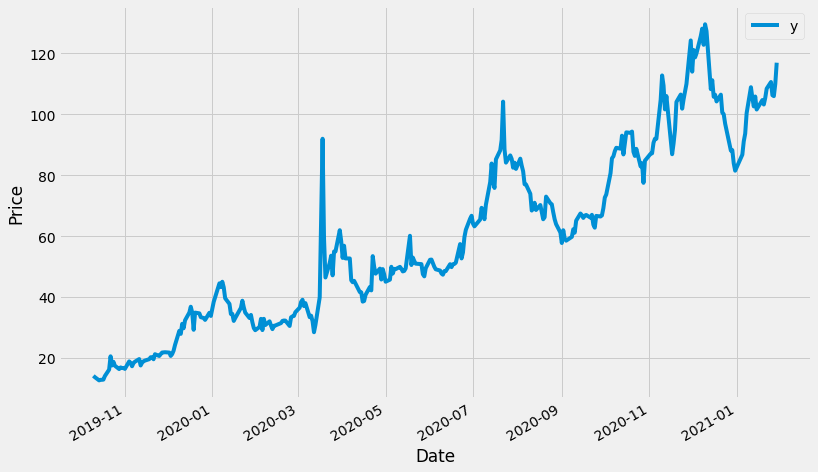

In [263]:
ax = prophet_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [264]:
model.fit(prophet_df)

In [265]:
future=model.make_future_dataframe(periods=62)

In [266]:
future.tail(5)

ds
386 2021-03-28
387 2021-03-29
388 2021-03-30
389 2021-03-31
390 2021-04-01

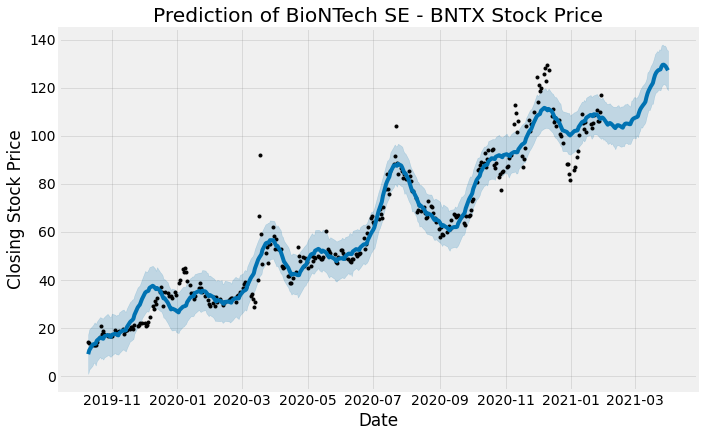

ds        yhat  yhat_lower  yhat_upper
386 2021-03-28  129.569838  121.512850  137.443663
387 2021-03-29  129.280499  121.312413  137.552865
388 2021-03-30  128.785375  120.905542  136.952037
389 2021-03-31  128.008177  119.578077  135.633824
390 2021-04-01  127.219410  118.944640  135.479309

In [267]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of BioNTech SE - BNTX Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

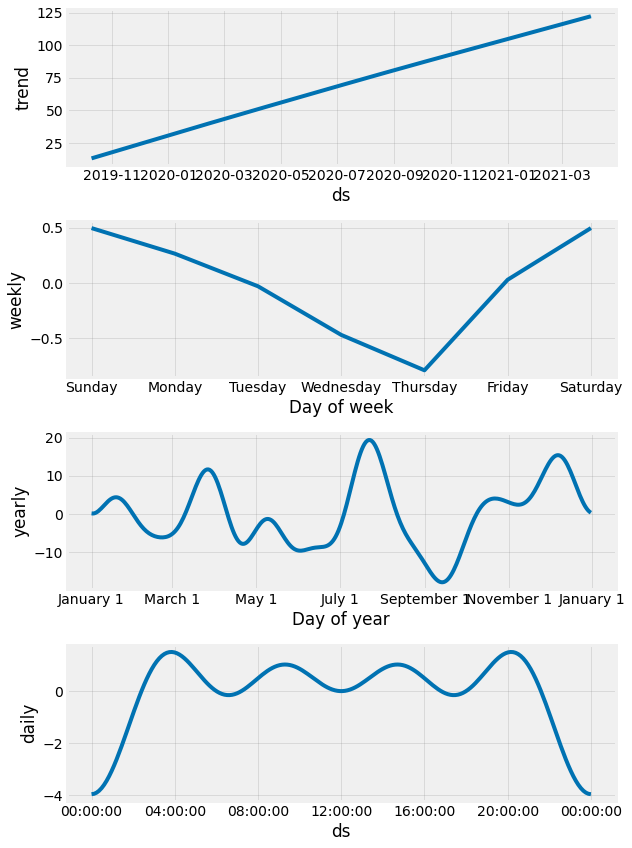

In [268]:
model.plot_components(predictions)
plt.show()

In [269]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2019-10-10   9.082696    0.907205   17.265633
1 2019-10-11  10.697801    2.312128   19.113165
2 2019-10-14  12.976784    4.799979   22.183271
3 2019-10-15  13.249982    4.681681   21.460597
4 2019-10-16  13.325020    5.136731   21.191387

In [270]:
df_test.head()

Date        High         Low        Open       Close   Volume  \
330 2021-02-02  115.879997  110.559998  115.000000  114.760002  1906700   
331 2021-02-03  119.250000  113.709999  114.209999  118.019997  2426900   
332 2021-02-04  120.088997  116.989998  117.900002  117.559998  1441700   
333 2021-02-05  119.209999  116.559998  117.430000  117.570000   875000   
334 2021-02-08  120.989998  117.599998  117.610001  119.500000  1922900   

      Adj Close  
330  114.760002  
331  118.019997  
332  117.559998  
333  117.570000  
334  119.500000

In [271]:
df_test['predictions']=predictions['yhat']

In [272]:
df_test.head()

Date        High         Low        Open       Close   Volume  \
330 2021-02-02  115.879997  110.559998  115.000000  114.760002  1906700   
331 2021-02-03  119.250000  113.709999  114.209999  118.019997  2426900   
332 2021-02-04  120.088997  116.989998  117.900002  117.559998  1441700   
333 2021-02-05  119.209999  116.559998  117.430000  117.570000   875000   
334 2021-02-08  120.989998  117.599998  117.610001  119.500000  1922900   

      Adj Close  predictions  
330  114.760002   107.215281  
331  118.019997   106.627556  
332  117.559998   105.981882  
333  117.570000   105.204798  
334  119.500000   104.566214

(array([737822., 737829., 737836., 737843., 737850., 737857., 737864.,
        737871., 737881.]), <a list of 9 Text major ticklabel objects>)

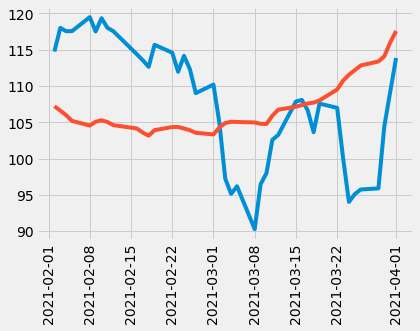

In [273]:
plt.plot(df_test['Date'],df_test['Close'])
plt.plot(df_test['Date'],df_test['predictions'])
plt.xticks(rotation=90)

## LSTM

In [274]:
from sklearn.preprocessing import MinMaxScaler


In [275]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("BNTX", start="2017-01-01")

In [276]:
df.head()

High     Low   Open  Close   Volume  Adj Close
Date                                                           
2019-10-10  16.698999  13.010  16.50  14.24  2805800      14.24
2019-10-11  15.340000  13.500  15.34  13.82  1364300      13.82
2019-10-14  13.910000  12.525  13.83  12.75   899100      12.75
2019-10-15  13.000000  12.530  12.99  12.92   484700      12.92
2019-10-16  13.880000  12.610  13.20  12.94   524200      12.94

In [277]:
df.tail()

High         Low        Open       Close   Volume  \
Date                                                                  
2021-04-09  123.500000  114.720001  114.949997  122.139999  4186600   
2021-04-12  122.250000  118.290001  120.550003  121.519997  1620200   
2021-04-13  130.809998  124.769997  125.000000  129.639999  4187500   
2021-04-14  132.600006  129.210007  130.800003  132.600006  3344400   
2021-04-15  140.789993  128.160004  130.000000  140.720001  3693148   

             Adj Close  
Date                    
2021-04-09  122.139999  
2021-04-12  121.519997  
2021-04-13  129.639999  
2021-04-14  132.600006  
2021-04-15  140.720001

In [278]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(381, 1)


array([[16.5       ],
       [15.34000015],
       [13.82999992],
       [12.98999977],
       [13.19999981]])

In [279]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [280]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.02997182],
       [0.02006661],
       [0.00717274],
       [0.        ],
       [0.00179319]])

In [281]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.65826998],
       [0.70385957],
       [0.6204423 ],
       [0.68832717],
       [0.71078472]])

In [282]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [283]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.02997182, 0.02006661, 0.00717274, 0.        , 0.00179319,
        0.00213474, 0.00264709, 0.01665101, 0.03466825, 0.07650927,
        0.04901374, 0.04704978, 0.03492443, 0.03355819, 0.03424131,
        0.03253351, 0.03253351, 0.03466825, 0.06318845, 0.04611049,
        0.03731535, 0.04576894, 0.05439331, 0.05558876, 0.04107249,
        0.05012382, 0.05217317, 0.05260012, 0.05678421, 0.05985825,
        0.06668943, 0.05985825, 0.08163264, 0.06865341, 0.07625309,
        0.07693621, 0.08257194, 0.07736315, 0.07258133, 0.07480147,
        0.08419435, 0.10255315, 0.13670907, 0.13414738, 0.1683033 ,
        0.16360687, 0.21731703, 0.2008368 , 0.19204166, 0.17829389]])

In [284]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.65826998, 0.70385957, 0.6204423 , 0.68832717, 0.71078472,
        0.69105964, 0.68106905, 0.64896246, 0.65421398, 0.64238748,
        0.59781399, 0.57125776, 0.58492011, 0.63205532, 0.63968914,
        0.61412347, 0.62778583, 0.66894371, 0.67466481, 0.86269312,
        0.82836645, 0.84544441, 0.80112708, 0.77815727, 0.71428567,
        0.64904787, 0.66441806, 0.67124921, 0.74297665, 0.82606095,
        0.7508325 , 0.74297665, 0.7979677 , 0.85944833, 0.95218166,
        0.92101437, 0.91247539, 0.89532916, 0.92229523, 0.97352911,
        0.99052173, 0.94637515, 1.        , 0.97036113, 0.86431555,
        0.847323  , 0.76547688, 0.79813845, 0.80710441, 0.80334724]])

In [285]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [286]:
#Import all deep learing learning library to create LSTM model
#import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [287]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [288]:
model.add(Dense(units=1))

In [289]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [290]:
#Fit the model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 254 samples
Epoch 1/5
254/254 [==============================] - 22s 88ms/sample - loss: 0.0912
Epoch 2/5
254/254 [==============================] - 3s 11ms/sample - loss: 0.0288
Epoch 3/5
254/254 [==============================] - 3s 11ms/sample - loss: 0.0211
Epoch 4/5
254/254 [==============================] - 3s 11ms/sample - loss: 0.0174
Epoch 5/5
254/254 [==============================] - 3s 11ms/sample - loss: 0.0141


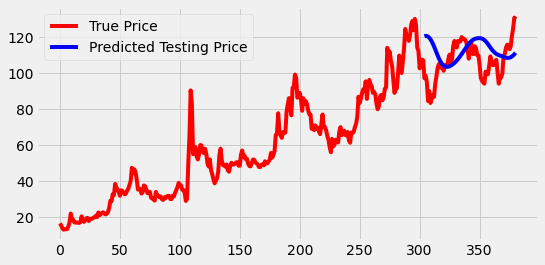

In [291]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

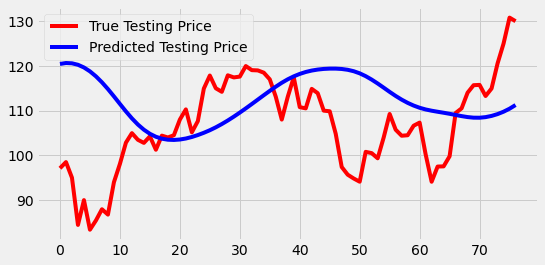

In [292]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [293]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[111.2571, 114.12453, 119.576355, 127.24903, 136.37518]


## Calculating Return Of Portfolio Security

In [294]:
#Load the data
tickers = ['PFE', 'JNJ', 'MRNA', 'AZN', 'BNTX']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2016-1-1')['Close']

In [295]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1330 entries, 2016-01-04 to 2021-04-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PFE     1330 non-null   float64
 1   JNJ     1330 non-null   float64
 2   MRNA    592 non-null    float64
 3   AZN     1330 non-null   float64
 4   BNTX    381 non-null    float64
dtypes: float64(5)
memory usage: 62.3 KB


In [296]:
mydata.tail()

PFE         JNJ        MRNA        AZN        BNTX
Date                                                                
2021-04-09  36.599998  161.250000  140.919998  49.939999  122.139999
2021-04-12  36.970001  161.639999  139.399994  49.419998  121.519997
2021-04-13  37.160000  159.479996  149.710007  49.189999  129.639999
2021-04-14  37.169998  159.919998  160.029999  49.840000  132.600006
2021-04-15  37.610001  160.690002  159.869995  50.830002  140.720001

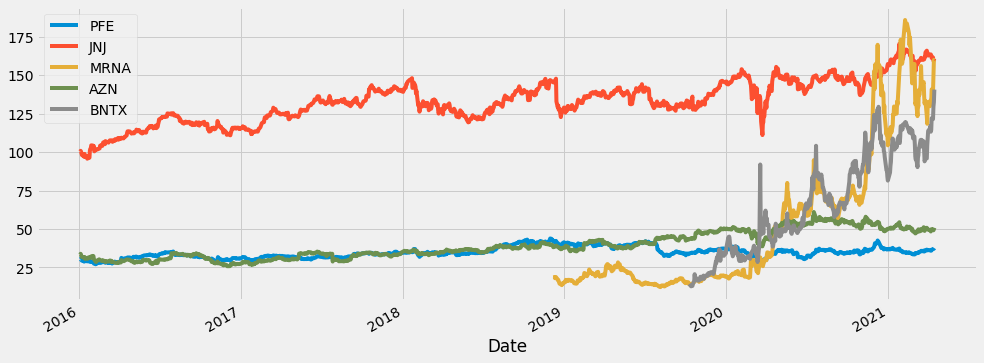

In [297]:
mydata.plot(figsize = (15, 6))
plt.show()

In [298]:
mydata.iloc[0]

PFE      30.313093
JNJ     100.480003
MRNA           NaN
AZN      33.400002
BNTX           NaN
Name: 2016-01-04 00:00:00, dtype: float64

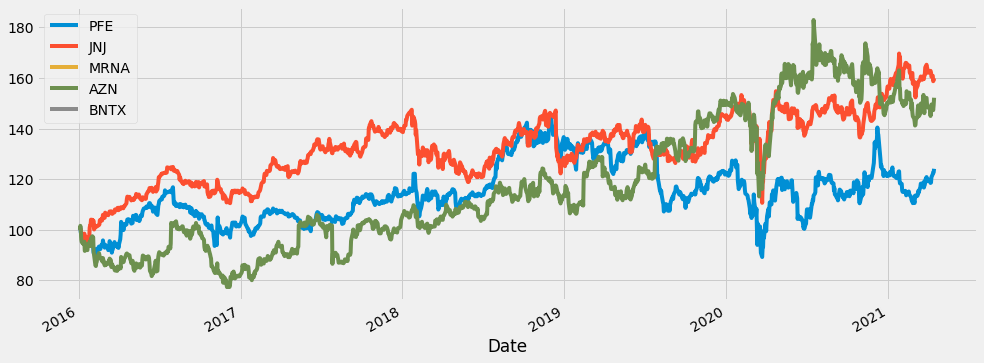

In [299]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [300]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

PFE       JNJ      MRNA       AZN      BNTX
Date                                                        
2021-04-09  0.017798 -0.010554  0.052584  0.008889  0.066818
2021-04-12  0.010109  0.002419 -0.010786 -0.010413 -0.005076
2021-04-13  0.005139 -0.013363  0.073960 -0.004654  0.066820
2021-04-14  0.000269  0.002759  0.068933  0.013214  0.022833
2021-04-15  0.011838  0.004815 -0.001000  0.019864  0.061237

In [301]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [302]:
annual_returns = returns.mean() * 250
annual_returns

PFE     0.064980
JNJ     0.107746
MRNA    1.242888
AZN     0.112747
BNTX    2.188175
dtype: float64

In [303]:
pfolio_1 = str(np.dot(annual_returns, weights) * 100) + ' %'
print (pfolio_1)

74.33071570846334 %


In [304]:
weights_2 = np.array([0.20, 0.05, 0.15, 0.20, 0.40])

In [305]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print ('pfolio_2 is '+pfolio_2)
print ('pfolio_1 is '+ pfolio_1)

pfolio_2 is 110.26400000000001 %
pfolio_1 is 74.33071570846334 %


In [306]:
mydata.iloc[1320]

PFE      36.299999
JNJ     162.830002
MRNA    132.550003
AZN      49.529999
BNTX    113.870003
Name: 2021-04-01 00:00:00, dtype: float64

# Portfolio Optimization

In [307]:
matrix_covariance_portfolio = returns.iloc[:,:]
matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*252

matrix_covariance_portfolio

PFE       JNJ      MRNA       AZN      BNTX
PFE   0.049216  0.025360  0.035738  0.022545  0.113243
JNJ   0.025360  0.039006  0.024351  0.020413  0.081627
MRNA  0.035738  0.024351  0.685665  0.024895  0.369375
AZN   0.022545  0.020413  0.024895  0.067736  0.064385
BNTX  0.113243  0.081627  0.369375  0.064385  1.465079

In [308]:
portfolio_variance = np.dot(weights_2.T,np.dot(matrix_covariance_portfolio, weights_2))

#standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk


0.5808170853375839

In [309]:
portfolio_returns =[]
portfolio_risk =[]
sharpe_ratio_port =[]
portfolio_weights =[]

In [310]:
number_of_portfolios = 2000
RF = 0
portfolio_returns =[]
portfolio_risk =[]
sharpe_ratio_port =[]
portfolio_weights =[]

for portfolio in range (number_of_portfolios):
    weights = np.random.random_sample((len(tickers)))
    print(type(weights))
    print(weights)
    #below line ensures that the sum of our weights is 1
    weights = weights / np.sum(weights)
    annualize_return = np.sum((returns.mean() * weights) * 252)
    portfolio_returns.append(annualize_return)
    #variance
    matrix_covariance_portfolio = (returns.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
  #sharpe_ratio
    sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)

  #keep weights as well to find out later the weights from the optimized portfolio
    portfolio_weights.append(weights)

<class 'numpy.ndarray'>
[0.13104091 0.18807841 0.91959984 0.08402589 0.12803901]
<class 'numpy.ndarray'>
[0.28928331 0.09874488 0.17292489 0.69214778 0.92668983]
<class 'numpy.ndarray'>
[0.52238323 0.2311066  0.26398775 0.87415222 0.3590043 ]
<class 'numpy.ndarray'>
[0.88697638 0.84625384 0.46642097 0.49144062 0.65104773]
<class 'numpy.ndarray'>
[0.59951571 0.82857208 0.33912639 0.11974372 0.5355905 ]
<class 'numpy.ndarray'>
[0.32509903 0.32237103 0.0503503  0.51284646 0.52238306]
<class 'numpy.ndarray'>
[0.37399636 0.04127815 0.475772   0.87017003 0.35032766]
<class 'numpy.ndarray'>
[0.78907215 0.07159403 0.21829343 0.31139238 0.50355255]
<class 'numpy.ndarray'>
[0.52432326 0.48981454 0.61605596 0.66851863 0.50713575]
<class 'numpy.ndarray'>
[0.53557726 0.91793882 0.30888855 0.49299022 0.21520124]
<class 'numpy.ndarray'>
[0.72468736 0.3855779  0.04957156 0.60118139 0.31966043]
<class 'numpy.ndarray'>
[0.92915162 0.37007951 0.49436669 0.76841514 0.86730995]
<class 'numpy.ndarray'>
[0.5

<class 'numpy.ndarray'>
[0.55135149 0.56453116 0.17795894 0.56973553 0.25174213]
<class 'numpy.ndarray'>
[0.71962246 0.0134933  0.71640005 0.21833475 0.30536889]
<class 'numpy.ndarray'>
[0.39105622 0.07381175 0.70252052 0.523161   0.61529139]
<class 'numpy.ndarray'>
[0.53032286 0.87752821 0.12602089 0.95260679 0.03049914]
<class 'numpy.ndarray'>
[0.42542457 0.28066868 0.52784217 0.45241313 0.92134254]
<class 'numpy.ndarray'>
[0.29802389 0.74940393 0.55020423 0.75377091 0.99115448]
<class 'numpy.ndarray'>
[0.56371458 0.49180916 0.34365463 0.77054268 0.35179062]
<class 'numpy.ndarray'>
[0.69329996 0.57005234 0.93354618 0.80974649 0.18499637]
<class 'numpy.ndarray'>
[0.49194999 0.7412437  0.65658655 0.81335985 0.81515761]
<class 'numpy.ndarray'>
[0.98115164 0.85958785 0.74497324 0.33012929 0.7029898 ]
<class 'numpy.ndarray'>
[0.18320051 0.97771079 0.73176131 0.25354543 0.93277654]
<class 'numpy.ndarray'>
[0.17117777 0.85737303 0.59397793 0.21931924 0.9680835 ]
<class 'numpy.ndarray'>
[0.3

<class 'numpy.ndarray'>
[0.55212716 0.24866313 0.01184442 0.87675279 0.98481148]
<class 'numpy.ndarray'>
[0.43781568 0.83653466 0.03455322 0.01840781 0.1724821 ]
<class 'numpy.ndarray'>
[0.38064655 0.11424659 0.88039329 0.8111809  0.44930853]
<class 'numpy.ndarray'>
[0.4186523  0.10155304 0.85732763 0.99274187 0.08670762]
<class 'numpy.ndarray'>
[0.70241944 0.41874056 0.94520852 0.87795702 0.60203948]
<class 'numpy.ndarray'>
[0.21795388 0.52476034 0.30625473 0.14170642 0.46555724]
<class 'numpy.ndarray'>
[0.69349091 0.60908711 0.9619575  0.14065153 0.04097093]
<class 'numpy.ndarray'>
[0.83179992 0.5403286  0.45703093 0.25827643 0.22656125]
<class 'numpy.ndarray'>
[0.96259052 0.35641029 0.60713767 0.11703566 0.35466022]
<class 'numpy.ndarray'>
[0.44643633 0.01251778 0.5539826  0.00195859 0.36220978]
<class 'numpy.ndarray'>
[0.9357755  0.42601471 0.50901278 0.59247531 0.46273825]
<class 'numpy.ndarray'>
[0.23303006 0.09117198 0.05498203 0.38305005 0.96254666]
<class 'numpy.ndarray'>
[0.4

<class 'numpy.ndarray'>
[0.71561296 0.85037439 0.34306939 0.72419064 0.1584843 ]
<class 'numpy.ndarray'>
[0.3108628  0.9003184  0.92972014 0.36572566 0.860602  ]
<class 'numpy.ndarray'>
[0.5162692  0.83391163 0.33552877 0.69666804 0.813854  ]
<class 'numpy.ndarray'>
[0.58109962 0.82188324 0.03787823 0.51308816 0.19542377]
<class 'numpy.ndarray'>
[0.75427473 0.47969895 0.74280085 0.1062974  0.69450729]
<class 'numpy.ndarray'>
[0.23394694 0.4147934  0.63270748 0.32688129 0.80442439]
<class 'numpy.ndarray'>
[0.85675952 0.97034628 0.37206987 0.29661973 0.76811405]
<class 'numpy.ndarray'>
[0.55350323 0.22349226 0.43866009 0.26124167 0.03452746]
<class 'numpy.ndarray'>
[0.47032047 0.45013791 0.53653707 0.06388118 0.22454584]
<class 'numpy.ndarray'>
[0.3074048  0.11067531 0.45116013 0.12408343 0.00706938]
<class 'numpy.ndarray'>
[0.26581519 0.74301247 0.69955394 0.70004501 0.64732521]
<class 'numpy.ndarray'>
[0.85598343 0.61904648 0.62037536 0.85165021 0.36562484]
<class 'numpy.ndarray'>
[0.5

<class 'numpy.ndarray'>
[0.32903583 0.0542254  0.86664455 0.32802752 0.56147772]
<class 'numpy.ndarray'>
[0.68725856 0.51600755 0.57004941 0.48187766 0.17125809]
<class 'numpy.ndarray'>
[0.74683948 0.98792417 0.26264499 0.86393132 0.86823504]
<class 'numpy.ndarray'>
[0.13009915 0.88117023 0.27215756 0.34705935 0.79576679]
<class 'numpy.ndarray'>
[0.70091991 0.54956421 0.19116735 0.29714786 0.33610029]
<class 'numpy.ndarray'>
[0.1776428  0.6480594  0.49448153 0.79673657 0.46677513]
<class 'numpy.ndarray'>
[0.73429694 0.62304924 0.28957327 0.70257561 0.15761723]
<class 'numpy.ndarray'>
[0.81131538 0.53378728 0.69729883 0.1305051  0.04091773]
<class 'numpy.ndarray'>
[0.38256953 0.66365637 0.81312783 0.02325888 0.33941969]
<class 'numpy.ndarray'>
[0.44383544 0.11871017 0.05810876 0.68329801 0.88341514]
<class 'numpy.ndarray'>
[0.19351202 0.01039372 0.06477519 0.11278822 0.96051015]
<class 'numpy.ndarray'>
[0.03915376 0.24833797 0.45137883 0.75160345 0.17346396]
<class 'numpy.ndarray'>
[0.2

<class 'numpy.ndarray'>
[0.30383419 0.95612897 0.46781119 0.6592879  0.02762518]
<class 'numpy.ndarray'>
[0.70298284 0.43265954 0.83046603 0.96588573 0.48182298]
<class 'numpy.ndarray'>
[0.61767383 0.0876204  0.49131089 0.79284492 0.07938768]
<class 'numpy.ndarray'>
[0.44521385 0.80923285 0.88037472 0.3791099  0.69391062]
<class 'numpy.ndarray'>
[0.22911103 0.43939595 0.97363543 0.57749677 0.62196182]
<class 'numpy.ndarray'>
[0.04970034 0.23017506 0.89667439 0.11266163 0.47373274]
<class 'numpy.ndarray'>
[0.75846283 0.39120326 0.58322973 0.66230763 0.62601443]
<class 'numpy.ndarray'>
[0.53901903 0.95608476 0.54368527 0.61266931 0.96117981]
<class 'numpy.ndarray'>
[0.22468245 0.53599181 0.12810597 0.15576769 0.69963695]
<class 'numpy.ndarray'>
[0.20208275 0.76698811 0.62765966 0.6407532  0.44499992]
<class 'numpy.ndarray'>
[0.63619767 0.22121026 0.45757405 0.14694258 0.88445906]
<class 'numpy.ndarray'>
[0.14184726 0.38959149 0.81251661 0.46608101 0.71992237]
<class 'numpy.ndarray'>
[0.5

<class 'numpy.ndarray'>
[0.51675234 0.35966347 0.46468066 0.21345349 0.91989229]
<class 'numpy.ndarray'>
[0.04322225 0.22885104 0.91852013 0.3793347  0.40523379]
<class 'numpy.ndarray'>
[0.9863965  0.07214931 0.63720237 0.12080782 0.2587378 ]
<class 'numpy.ndarray'>
[0.12030054 0.537791   0.15690013 0.88742318 0.01588997]
<class 'numpy.ndarray'>
[0.47313151 0.7507404  0.29860195 0.73444917 0.79372236]
<class 'numpy.ndarray'>
[0.8600815  0.28796162 0.72750822 0.15835871 0.79822568]
<class 'numpy.ndarray'>
[0.07667673 0.80351791 0.04325407 0.05449086 0.32756955]
<class 'numpy.ndarray'>
[0.57170945 0.46450294 0.27052848 0.56232618 0.18755507]
<class 'numpy.ndarray'>
[0.53667761 0.62743502 0.06979387 0.5646427  0.37792756]
<class 'numpy.ndarray'>
[0.8029559  0.18638754 0.35367889 0.68644245 0.63503753]
<class 'numpy.ndarray'>
[0.45203729 0.50648731 0.81636827 0.37139606 0.40781974]
<class 'numpy.ndarray'>
[0.92753614 0.04751934 0.48708793 0.59843261 0.61023952]
<class 'numpy.ndarray'>
[0.6

[0.02886775 0.81844457 0.271717   0.08508537 0.89395204]
<class 'numpy.ndarray'>
[0.19485991 0.79679864 0.0486085  0.16296606 0.4798055 ]
<class 'numpy.ndarray'>
[0.42442376 0.94521822 0.4697068  0.62006646 0.0532994 ]
<class 'numpy.ndarray'>
[0.67603421 0.51167452 0.49221558 0.03587517 0.90409946]
<class 'numpy.ndarray'>
[0.12560336 0.79514919 0.20766903 0.78192402 0.66159893]
<class 'numpy.ndarray'>
[0.84389531 0.99198841 0.82828301 0.21881971 0.04171392]
<class 'numpy.ndarray'>
[0.81724822 0.56996445 0.02882714 0.19474141 0.1766952 ]
<class 'numpy.ndarray'>
[0.02095413 0.09748524 0.51267333 0.90715341 0.93437747]
<class 'numpy.ndarray'>
[0.44038227 0.09290727 0.55855251 0.99231263 0.11703952]
<class 'numpy.ndarray'>
[0.05398892 0.41502739 0.45637657 0.81064924 0.92118622]
<class 'numpy.ndarray'>
[0.30037978 0.54295335 0.84165568 0.5428787  0.93939622]
<class 'numpy.ndarray'>
[0.41338303 0.5793823  0.41020852 0.5511429  0.93249241]
<class 'numpy.ndarray'>
[0.54875395 0.97547748 0.068

<class 'numpy.ndarray'>
[0.77790459 0.17011544 0.79818428 0.62744244 0.85327396]
<class 'numpy.ndarray'>
[0.49367745 0.37431156 0.10414695 0.36107671 0.14052194]
<class 'numpy.ndarray'>
[0.9447579  0.9022413  0.98223312 0.25494043 0.28133276]
<class 'numpy.ndarray'>
[0.8506721  0.10279168 0.15762414 0.14212651 0.50071828]
<class 'numpy.ndarray'>
[0.5964985  0.07459823 0.69422651 0.76560545 0.67050422]
<class 'numpy.ndarray'>
[0.7773191  0.22154508 0.69928067 0.13551773 0.47528568]
<class 'numpy.ndarray'>
[0.07285845 0.25493613 0.3490465  0.63524851 0.45232716]
<class 'numpy.ndarray'>
[0.08485933 0.31939938 0.78351147 0.74857706 0.04889349]
<class 'numpy.ndarray'>
[0.6729398  0.73358545 0.32595131 0.76912702 0.27127595]
<class 'numpy.ndarray'>
[4.73755700e-01 4.74121462e-01 1.40708712e-04 6.27715704e-01
 3.45850320e-01]
<class 'numpy.ndarray'>
[0.96330287 0.51276446 0.35724787 0.53726235 0.09878458]
<class 'numpy.ndarray'>
[0.29000209 0.20539329 0.91125573 0.18464905 0.57717592]
<class 

<class 'numpy.ndarray'>
[0.5862739  0.03126299 0.5120225  0.52827817 0.22587534]
<class 'numpy.ndarray'>
[0.98870272 0.52840409 0.87552769 0.31435101 0.3898716 ]
<class 'numpy.ndarray'>
[0.00956686 0.13664946 0.23511699 0.86943898 0.43660374]
<class 'numpy.ndarray'>
[0.4822194  0.29779937 0.72751718 0.79844441 0.56092056]
<class 'numpy.ndarray'>
[0.45211614 0.05038898 0.50798653 0.56655388 0.71528611]
<class 'numpy.ndarray'>
[0.86919513 0.686852   0.30798195 0.04795841 0.25036423]
<class 'numpy.ndarray'>
[0.39222125 0.10225321 0.35254245 0.26976702 0.37365391]
<class 'numpy.ndarray'>
[0.13711712 0.58664703 0.77508246 0.79612385 0.50686804]
<class 'numpy.ndarray'>
[0.3273578  0.83684791 0.92142369 0.22792336 0.32615602]
<class 'numpy.ndarray'>
[0.641547   0.79215749 0.14589654 0.75071704 0.07774136]
<class 'numpy.ndarray'>
[0.22683976 0.52324221 0.80634972 0.00407657 0.75079263]
<class 'numpy.ndarray'>
[0.77941629 0.73844031 0.90408214 0.72912399 0.08883821]
<class 'numpy.ndarray'>
[0.8

<class 'numpy.ndarray'>
[0.948862   0.52706165 0.83889049 0.32719996 0.25016858]
<class 'numpy.ndarray'>
[0.85626389 0.41883095 0.55396756 0.09800653 0.59048695]
<class 'numpy.ndarray'>
[0.92572892 0.51027971 0.13323187 0.15402543 0.93842911]
<class 'numpy.ndarray'>
[0.85716571 0.34941165 0.29033562 0.02826    0.13392178]
<class 'numpy.ndarray'>
[0.3607648  0.01529026 0.68507199 0.29193723 0.98508871]
<class 'numpy.ndarray'>
[0.14264723 0.57838277 0.82634478 0.24419924 0.93952107]
<class 'numpy.ndarray'>
[0.31728525 0.40701674 0.76130912 0.69891593 0.78991461]
<class 'numpy.ndarray'>
[0.55902218 0.64170249 0.98510134 0.5414587  0.3040636 ]
<class 'numpy.ndarray'>
[0.15348076 0.90104329 0.67176819 0.42063012 0.98130788]
<class 'numpy.ndarray'>
[0.28906597 0.27036383 0.84587634 0.30074887 0.64321286]
<class 'numpy.ndarray'>
[0.38285988 0.08322644 0.24609785 0.32512953 0.02566829]
<class 'numpy.ndarray'>
[0.12003731 0.06869324 0.40747248 0.20009224 0.28021782]
<class 'numpy.ndarray'>
[0.8

<class 'numpy.ndarray'>
[0.90593866 0.76795618 0.30865928 0.97185822 0.89366182]
<class 'numpy.ndarray'>
[0.72304324 0.46437326 0.33420071 0.91133172 0.58407578]
<class 'numpy.ndarray'>
[0.0856455  0.06297715 0.04831836 0.865679   0.55581694]
<class 'numpy.ndarray'>
[0.46686721 0.33133991 0.11480931 0.12546167 0.12443181]
<class 'numpy.ndarray'>
[0.96307418 0.89820678 0.17140735 0.76518671 0.85874218]
<class 'numpy.ndarray'>
[0.02666131 0.37312768 0.4028266  0.23737922 0.83581203]
<class 'numpy.ndarray'>
[0.91023935 0.82805873 0.84185371 0.59732831 0.77987455]
<class 'numpy.ndarray'>
[0.1578774  0.21970836 0.61428226 0.89167544 0.52122529]
<class 'numpy.ndarray'>
[0.76224616 0.21574995 0.20220176 0.28795224 0.93875519]
<class 'numpy.ndarray'>
[0.94881021 0.38076099 0.93342619 0.83748556 0.33908745]
<class 'numpy.ndarray'>
[0.9532526  0.35473137 0.60687466 0.5709362  0.34049678]
<class 'numpy.ndarray'>
[0.13921847 0.85254332 0.23014247 0.21797059 0.29140831]
<class 'numpy.ndarray'>
[0.1

<class 'numpy.ndarray'>
[0.06042288 0.34400081 0.57271451 0.46666409 0.43916127]
<class 'numpy.ndarray'>
[0.10068066 0.21450815 0.6808021  0.5390742  0.98887639]
<class 'numpy.ndarray'>
[0.79449164 0.03564652 0.35562363 0.9482996  0.29564523]
<class 'numpy.ndarray'>
[0.86912665 0.2988519  0.66645453 0.22410891 0.85536118]
<class 'numpy.ndarray'>
[0.22568936 0.45327755 0.09797849 0.12728146 0.39849421]
<class 'numpy.ndarray'>
[0.19310028 0.50955218 0.30450569 0.91765399 0.77044728]
<class 'numpy.ndarray'>
[0.54529415 0.56665725 0.4672887  0.94428288 0.53785831]
<class 'numpy.ndarray'>
[0.00134492 0.46684543 0.8859523  0.64851069 0.30874555]
<class 'numpy.ndarray'>
[0.04208744 0.19810219 0.80187069 0.40871037 0.45439695]
<class 'numpy.ndarray'>
[0.03522622 0.50822399 0.57309109 0.79037536 0.94548297]
<class 'numpy.ndarray'>
[0.40352808 0.16234864 0.00731508 0.59874449 0.98777861]
<class 'numpy.ndarray'>
[0.46164071 0.16950872 0.95694967 0.95035171 0.1624861 ]
<class 'numpy.ndarray'>
[0.9

<class 'numpy.ndarray'>
[0.79215029 0.93522218 0.56976656 0.71807806 0.530576  ]
<class 'numpy.ndarray'>
[0.57330455 0.59872753 0.70739231 0.32317438 0.663714  ]
<class 'numpy.ndarray'>
[0.43063071 0.11748437 0.20752663 0.73971739 0.05658675]
<class 'numpy.ndarray'>
[0.21971385 0.54598437 0.56597065 0.62924597 0.46531696]
<class 'numpy.ndarray'>
[0.17040619 0.23376524 0.51927948 0.52547305 0.17708714]
<class 'numpy.ndarray'>
[0.33212199 0.72328046 0.23566259 0.91765951 0.34077062]
<class 'numpy.ndarray'>
[0.68390159 0.94607626 0.99011187 0.87733655 0.87335388]
<class 'numpy.ndarray'>
[0.10715587 0.44186308 0.32010552 0.91668886 0.22155822]
<class 'numpy.ndarray'>
[0.28203207 0.91257321 0.60831127 0.9442614  0.40961112]
<class 'numpy.ndarray'>
[0.85277041 0.96361621 0.61033983 0.83780816 0.47400605]
<class 'numpy.ndarray'>
[0.20026404 0.65589626 0.59290275 0.0056255  0.94384158]
<class 'numpy.ndarray'>
[0.69304678 0.10745282 0.51228154 0.15126439 0.78120361]
<class 'numpy.ndarray'>
[0.4

<class 'numpy.ndarray'>
[0.08433595 0.02880127 0.15375013 0.70402244 0.49575391]
<class 'numpy.ndarray'>
[1.18093790e-04 7.96137336e-02 6.83039005e-01 6.48736442e-01
 1.22378641e-01]
<class 'numpy.ndarray'>
[0.66057019 0.59916742 0.60755315 0.56253044 0.71537132]
<class 'numpy.ndarray'>
[0.92947757 0.96651    0.00548032 0.66871287 0.17271274]
<class 'numpy.ndarray'>
[0.44861203 0.55783996 0.305328   0.24977466 0.47029892]
<class 'numpy.ndarray'>
[0.38475489 0.89708291 0.95828636 0.23018018 0.22239186]
<class 'numpy.ndarray'>
[0.37776252 0.36610298 0.27769356 0.45458145 0.54332437]
<class 'numpy.ndarray'>
[0.02563838 0.26944118 0.55006243 0.16284368 0.90228577]
<class 'numpy.ndarray'>
[0.78668987 0.83050222 0.48729943 0.23756009 0.38115783]
<class 'numpy.ndarray'>
[0.71454443 0.91799957 0.72654677 0.85967577 0.50725203]
<class 'numpy.ndarray'>
[0.38348677 0.11665904 0.26415992 0.52884404 0.66990337]
<class 'numpy.ndarray'>
[0.80795638 0.17315606 0.1620715  0.5094432  0.7967586 ]
<class 

<class 'numpy.ndarray'>
[0.98700851 0.75696611 0.03623482 0.30385742 0.42856791]
<class 'numpy.ndarray'>
[0.60014377 0.40164131 0.74665919 0.94187511 0.71732566]
<class 'numpy.ndarray'>
[0.80432722 0.16753813 0.00432805 0.84244832 0.59657729]
<class 'numpy.ndarray'>
[0.12559447 0.29098205 0.17727762 0.55261267 0.62685725]
<class 'numpy.ndarray'>
[0.58476935 0.3765062  0.55296406 0.83123803 0.97582565]
<class 'numpy.ndarray'>
[0.63576475 0.10309186 0.27577779 0.18994892 0.20877049]
<class 'numpy.ndarray'>
[0.55933313 0.97652563 0.25422431 0.59289541 0.11453358]
<class 'numpy.ndarray'>
[0.30474644 0.06922477 0.30539217 0.80963252 0.08358033]
<class 'numpy.ndarray'>
[0.9800748  0.6655476  0.58550545 0.29827568 0.45391856]
<class 'numpy.ndarray'>
[0.00434209 0.11102759 0.10067197 0.84416516 0.07000248]
<class 'numpy.ndarray'>
[0.36207279 0.70502125 0.4513005  0.90681581 0.61421523]
<class 'numpy.ndarray'>
[0.6882707  0.39634132 0.54797712 0.70865676 0.71276084]
<class 'numpy.ndarray'>
[0.7

In [311]:
#convert to arrays
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

In [312]:
portfolio_risk 

array([0.58728319, 0.58315905, 0.3233489 , ..., 0.53485118, 0.21709533,
       0.32825257])

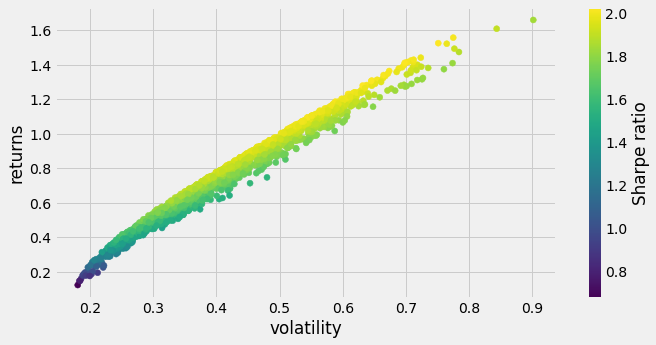

In [313]:
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

In [314]:
porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 
#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
#Rename the columns:
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)
portfolio_dfs

Port Returns  Port Risk  Sharpe Ratio  \
0         1.015365   0.587283      1.728919   
1         1.086784   0.583159      1.863615   
2         0.569281   0.323349      1.760578   
3         0.666103   0.363308      1.833438   
4         0.721998   0.390494      1.848938   
...            ...        ...           ...   
1995      0.779875   0.409561      1.904174   
1996      0.824007   0.434272      1.897442   
1997      1.069086   0.534851      1.998848   
1998      0.273984   0.217095      1.262043   
1999      0.611548   0.328253      1.863042   

                                      Portfolio Weights  
0     [0.09032420177375271, 0.129639146120342, 0.633...  
1     [0.13271150968842577, 0.0453001671976984, 0.07...  
2     [0.2321049136172343, 0.10268510415877494, 0.11...  
3     [0.2653917842023088, 0.25320721228930787, 0.13...  
4     [0.24747316111554848, 0.3420249845942886, 0.13...  
...                                                 ...  
1995  [0.20719515599690033, 0.2338904103539915, 0.18...  
1996  [0.24317787154425333, 0.2411779040498023, 0.17...  
1997  [0.058817326878480625, 0.179533287143604, 0.33...  
1998  [0.35154653888449694, 0.496795331236771, 0.056...  
1999  [0.0505910536239127, 0.3631756839723161, 0.212...  

[2000 rows x 4 columns]

In [315]:
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

print(Highest_sharpe_port)


Port Returns                                                  1.524433
Port Risk                                                     0.751051
Sharpe Ratio                                                  2.029733
Portfolio Weights    [0.003975039397566949, 0.07719625319237314, 0....
Name: 282, dtype: object


In [316]:
Highest_sharpe_port['Portfolio Weights']

array([0.00397504, 0.07719625, 0.47159366, 0.02939564, 0.41783941])

In [317]:
sum(Highest_sharpe_port['Portfolio Weights'])

1.0

In [318]:
print(min_risk)


Port Returns                                                  0.121978
Port Risk                                                     0.180686
Sharpe Ratio                                                   0.67508
Portfolio Weights    [0.20009528343147595, 0.45325452523160636, 0.0...
Name: 1076, dtype: object


In [319]:
min_risk['Portfolio Weights']

array([0.20009528, 0.45325453, 0.00864494, 0.33303413, 0.00497112])